<a href="https://colab.research.google.com/github/Osas1790/Heart-disease-prediction/blob/main/HEART_FAILURE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HEART FAILURE PREDICTION

## Context
- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

- Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]
##### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

## About the variables

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

##### Importing all the necessary libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

In [76]:
pip install colorama

In [77]:
hd = pd.read_csv("/content/sample_data/heart.csv")

In [78]:
hd.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N    0.000       Up             0  
1              N    1.000     Flat             1  
2              N    0.000       Up             0  
3              Y    1.500     Flat             1  
4              N    0.000       Up             0

In [79]:
hd.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N    1.200     Flat             1  
914    141              N    3.400     Flat             1  
915    115              Y    1.200     Flat             1  
916    174              N    0.000     Flat             1  
917    173              N    0.000       Up             0

#### PERFORMING Exploratory Data Analysis

In [80]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 12 variables and 918 observations in the dataset and this comprises of both cataegorical and numerical valuess

In [81]:
hd.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [82]:
hd.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

From the analysis above, there are no missing values

###### At this point, i want to count the values in each of the catagorical variables which is still part of my EDA

In [83]:
hd["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [84]:
hd["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [85]:
hd["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [86]:
hd["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [87]:
hd["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [88]:
hd.describe(include= object).T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

In [89]:
hd.describe().T

count    mean     std    min     25%     50%     75%     max
Age          918.000  53.511   9.433 28.000  47.000  54.000  60.000  77.000
RestingBP    918.000 132.397  18.514  0.000 120.000 130.000 140.000 200.000
Cholesterol  918.000 198.800 109.384  0.000 173.250 223.000 267.000 603.000
FastingBS    918.000   0.233   0.423  0.000   0.000   0.000   0.000   1.000
MaxHR        918.000 136.809  25.460 60.000 120.000 138.000 156.000 202.000
Oldpeak      918.000   0.887   1.067 -2.600   0.000   0.600   1.500   6.200
HeartDisease 918.000   0.553   0.497  0.000   0.000   1.000   1.000   1.000

In [90]:
hd.nunique() # checking for nunique values

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [91]:
# Checking for duplicates
hd.duplicated().value_counts()

False    918
dtype: int64

##### Analyzing the targart variables

1    508
0    410
Name: HeartDisease, dtype: int64


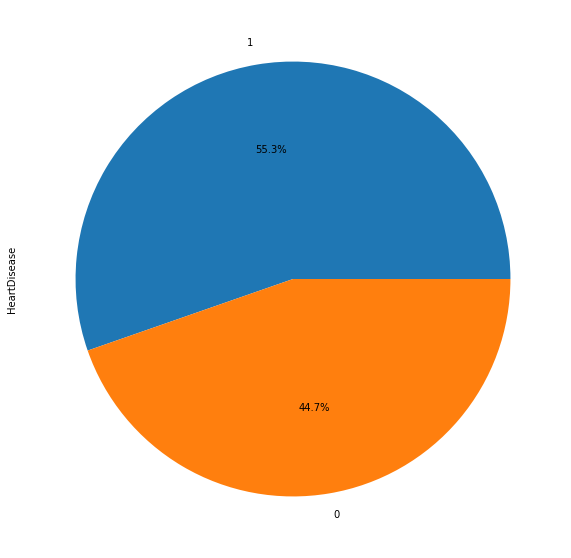

In [92]:
print(hd["HeartDisease"].value_counts())
hd["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

<div class="girk">
- From the above chart, it shows that there are <span class="mark">55.3%</span> of HeartDisease and <span class="mark">44.7%</span> cases for not HeartDisease</div><i class="fa fa-lightbulb-o "></i>

In [93]:
hd["HeartDisease"].describe()

count   918.000
mean      0.553
std       0.497
min       0.000
25%       0.000
50%       1.000
75%       1.000
max       1.000
Name: HeartDisease, dtype: float64

In [94]:
hd[hd['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'],
                                                                 cmap='RdPu')

In [95]:
hd[hd['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'],
                                                                 cmap='RdPu')

In [96]:
hd["HeartDisease"].skew()

-0.21508633825088655

In [97]:
hd["HeartDisease"].kurtosis()

-1.9580084425329685

In [98]:
hd["HeartDisease"].iplot(kind="hist")

##### At this point, i need to split the dataset into catagorical and numerical set for further analysis on the two dtypes

In [99]:
numerical= hd.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = hd.select_dtypes('object').columns

print(f'Numerical Columns:  {hd[numerical].columns}')
print('\n')
print(f'Categorical Columns: {hd[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [100]:
hd[numerical].head().T

0       1       2       3       4
Age          40.000  49.000  37.000  48.000  54.000
RestingBP   140.000 160.000 130.000 138.000 150.000
Cholesterol 289.000 180.000 283.000 214.000 195.000
FastingBS     0.000   0.000   0.000   0.000   0.000
MaxHR       172.000 156.000  98.000 108.000 122.000
Oldpeak       0.000   1.000   0.000   1.500   0.000

In [101]:
hd[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [102]:
hd[numerical].iplot(kind='hist');

In [103]:
hd[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [104]:
for c in numerical:
    hd[c].iplot(kind="box", title=c, boxpoints="all", color='lightseagreen')

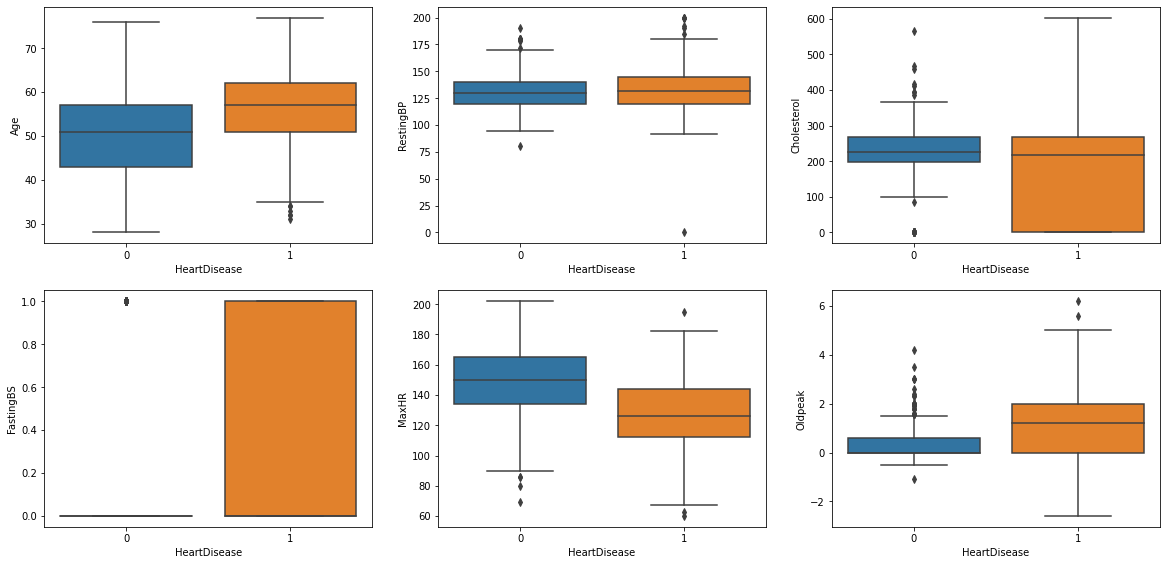

In [105]:
index = 0
plt.figure(figsize=(20,20))
for variable in numerical:
    if variable != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=variable, data=hd)

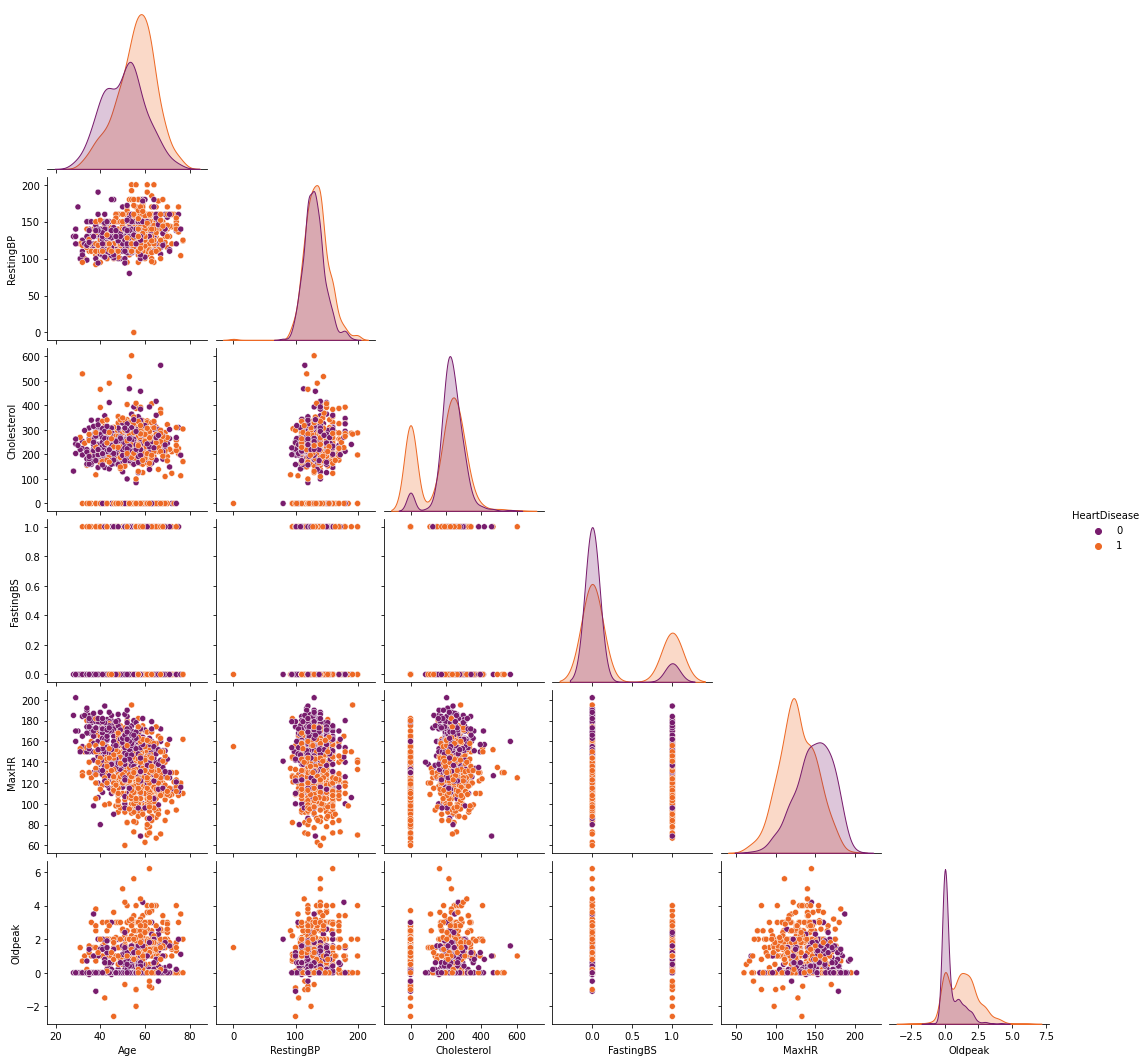

In [106]:
sns.pairplot(hd, hue="HeartDisease", palette="inferno", corner=True);

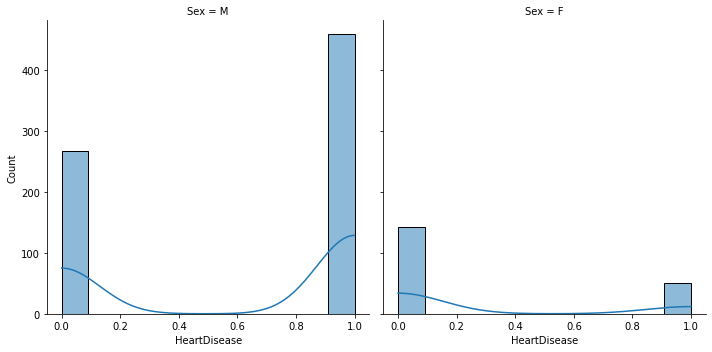

In [107]:
sns.displot(data=hd, x="HeartDisease", col="Sex", kde=True)

##### Knowing the skewness and Kurtosis

In [108]:
skew_vals = hd.skew().sort_values(ascending=False)
skew_vals

FastingBS       1.264
Oldpeak         1.023
RestingBP       0.180
MaxHR          -0.144
Age            -0.196
HeartDisease   -0.215
Cholesterol    -0.610
dtype: float64

In [109]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = hd.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

FastingBS      1.264
Oldpeak        1.023
Cholesterol   -0.610
dtype: float64

In [110]:
#Interpreting Skewness 

#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   -0.19593302867569365  means that the distribution is approx.   symmetric 
A skewness value of   0.1798393100516288  means that the distribution is approx.   symmetric 
A skewness value of   -0.6100864307268192  means that the distribution is approx.   highly skewed 
A skewness value of   1.2644841750727027  means that the distribution is approx.   highly skewed 
A skewness value of   -0.14435941846180994  means that the distribution is approx.   symmetric 
A skewness value of   1.0228720218107528  means that the distribution is approx.   highly skewed 
A skewness value of   -0.21508633825088655  means that the distribution is approx.   symmetric 


<div class="mark">
<span class="mark">Kurtosis are of three types:

Mesokurtic: When the tails of the distibution is similar to the normal distribution then it is <span class="girk">mesokurtic</span>. The kutosis for normal distibution is 3.

Leptokurtic: If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

Platykurtic: Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic. Hair et al. (2010) and Bryne</span> (2010) argued that data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7.

Multi-normality data tests are performed using leveling asymmetry tests (skewness < 3), (Kurtosis between -2 and 2) and Mardia criterion (< 3). Source Chemingui, H., & Ben lallouna, H. (2013).

Skewness and kurtosis index were used to identify the normality of the data. The result suggested the deviation of data from normality was not severe as the value of skewness and kurtosis index were below 3 and 10 respectively (Kline, 2011). Source Yadav, R., & Pathak, G. S. (2016).</div><i class="fa fa-lightbulb-o "></i>

In [111]:
kurtosis_vals = hd.kurtosis().sort_values(ascending=False)
kurtosis_vals

RestingBP       3.271
Oldpeak         1.203
Cholesterol     0.118
Age            -0.386
FastingBS      -0.402
MaxHR          -0.448
HeartDisease   -1.958
dtype: float64

In [112]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = hd.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

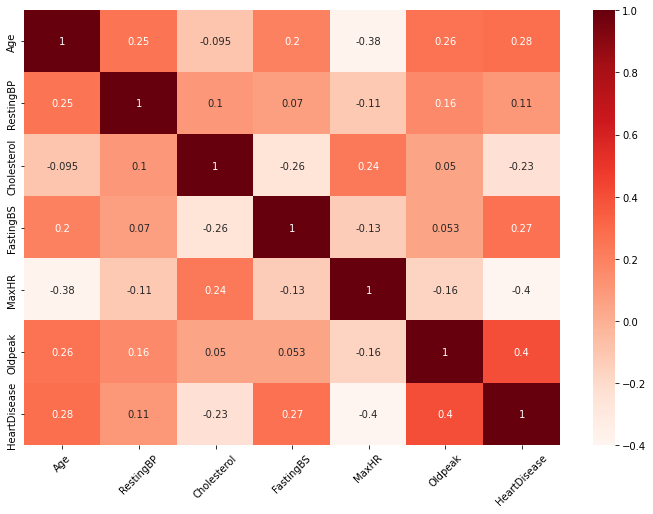

In [113]:
# Using pearson correlation

plt.figure(figsize=(12, 8))
sns.heatmap(hd.corr(), annot=True, cmap = plt.cm.Reds)
plt.xticks(rotation=45);

In [114]:
#count = "Done"
#feature =[]
#collinear=[]
#for col in hd.columns:
    #for i in hd.index:
        #if (hd[col][i]> .9 and hd[col][i] < 1) or (hd[col][i]< -.9 and hd[col][i] > -1) :
               # feature.append(col)
                ##print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
       # else:
           # print(f"For {col} and {i}, there is NO multicollinearity problem") 

#print("\033[1mThe number of strong corelated features:\033[0m", count) 

##### Analysis of Categorical Variables

In [115]:
hd[categorical].head().T

0       1    2       3       4
Sex                  M       F    M       F       M
ChestPainType      ATA     NAP  ATA     ASY     NAP
RestingECG      Normal  Normal   ST  Normal  Normal
ExerciseAngina       N       N    N       Y       N
ST_Slope            Up    Flat   Up    Flat      Up

In [116]:
hd[categorical].describe()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

In [117]:
for i in categorical:
   hd[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [118]:
hd[categorical].iplot(kind='hist');

In [119]:
hd[categorical].iplot(kind='histogram',subplots=True,bins=50)

###### Analysis of Sex and Age Variables

In [120]:
hd["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [121]:
hd['Sex'].iplot(kind='hist', )

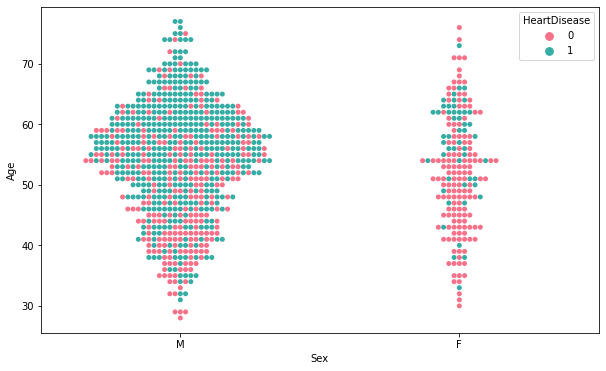

In [122]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=hd, palette="husl");

##### ChestPainType and HeartDisease

In [123]:
hd["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

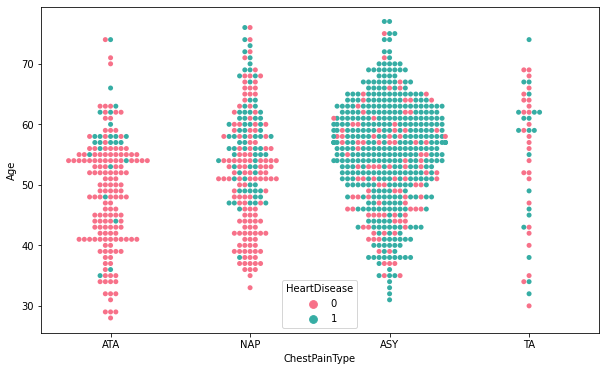

In [124]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=hd, palette="husl");


##### RestingECG and HeartDisease

In [125]:
hd["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [126]:
hd['RestingECG'].iplot(kind='hist')

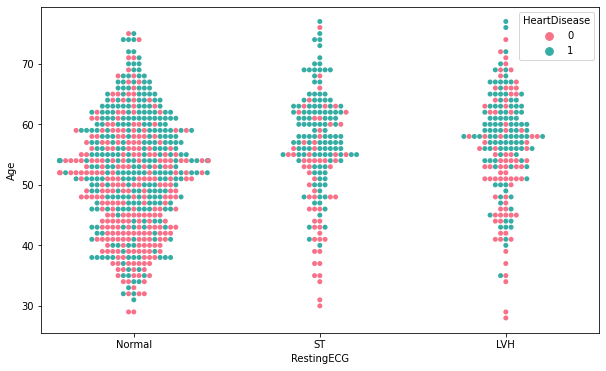

In [127]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=hd, palette="husl");

##### ExerciseAngina and HeartDisease

In [128]:
hd["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [129]:
hd['ExerciseAngina'].iplot(kind='hist')

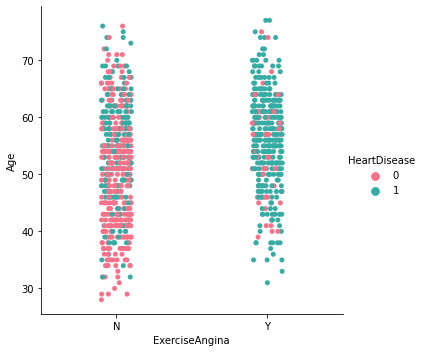

In [130]:
sns.catplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=hd, palette="husl");

##### ST_Slope and HeartDisease

In [131]:
hd["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [132]:
hd['ST_Slope'].iplot(kind='hist')

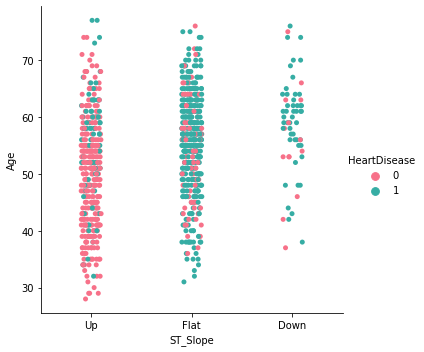

In [133]:
sns.catplot(y="Age", x="ST_Slope", hue="HeartDisease", data=hd, palette="husl");

##### Creating dummy variables at this point

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a MALE and 1 may indicate a FEMALE). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. Numeric variables can also be dummy coded to explore nonlinear effects. Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables.

In [134]:
hd.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N    0.000       Up             0  
1              N    1.000     Flat             1  
2              N    0.000       Up             0  
3              Y    1.500     Flat             1  
4              N    0.000       Up             0

In [135]:
hd.shape

(918, 12)

In [136]:
hd[categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    TA             Normal      N               Down          1
     NAP            Normal      Y               Flat          1
                                                Up            1
                    ST          N               Flat          1
M    TA             ST          Y               Flat          1
Length: 95, dtype: int64

In [137]:
# getting the dummies
hd = pd.get_dummies(hd, drop_first=True)

In [138]:
hd.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172    0.000             0   
1   49        160          180          0    156    1.000             1   
2   37        130          283          0     98    0.000             0   
3   48        138          214          0    108    1.500             1   
4   54        150          195          0    122    0.000             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

In [139]:
hd.shape

(918, 16)

##### At this point, i will now split the dataset into train and test i.e the columns of the dataset into input patterns(X) and output(y)

In [140]:
X = hd.drop(["HeartDisease"], axis=1)
y = hd["HeartDisease"]

Finally, i wil split the X and Y data into a training and test dataset. The training set will be used to prepare the models used in this analysis and the test set will be used to make new predictions, from which i can evaluate the performance of the model.

For this we will use the train_test_split() function from the scikit-learn library. We also specify a seed for the random number generator so that we always get the same split of data each time this example is executed.

In [141]:
from sklearn.model_selection import train_test_split

## Train / Test and Split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state = 0)

##### Scaling the variables and its implementation

Feature scaling (Normalization) is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

For machine learning, in general, it is necessary to normalize features so that no features are arbitrarily large (centering) and all features are on the same scale (scaling).

In general, algorithms that exploit distances or similarities (e.g. in the form of scalar product) between data samples, such as K-NN and SVM, are sensitive to feature transformations. So it is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors.

However, Graphical-model based classifiers, such as Fisher LDA or Naive Bayes, as well as Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling, but still, it might be a good idea to rescale/standardize your data.

NOTE: XGBoost actually implements a second algorithm too, based on linear boosting. Scaling will make a difference there

In [143]:
scaler = MinMaxScaler()
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [144]:
X_train_scaled = scaler.fit_transform(X_train)

In [145]:
X_test_scaled = scaler.transform(X_test)

##### INSIGHT

In [146]:
# General Insights

def model_first_insight(X_train, y_train, class_weight, solver='liblinear'):
    # Logistic Regression
    log = LogisticRegression(random_state=1, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=1, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
   
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=1, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=1, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    
    # XGB
    xgb = XGBClassifier(random_state=1, class_weight=class_weight)
    xgb.fit(X_train, y_train)
    
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=1)
    ab.fit(X_train, y_train)
    
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=1)
    gb.fit(X_train, y_train)
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    
    return log, svc, decision_tree, random_forest, knn, gb, ab, xgb

In [147]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
   
    # SVC
    svc = SVC(random_state=101, class_weight=class_weight)
    svc.fit(X_train, y_train) 
    
    # XGB
    xgb = XGBClassifier(random_state=101, class_weight=class_weight)
    xgb.fit(X_train, y_train)
    
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=101)
    ab.fit(X_train, y_train)
    
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=101)
    gb.fit(X_train, y_train)
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc}")    
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb}")
  
    return log.score(X_train, y_train), svc.score(X_train, y_train),decision_tree.score(X_train, y_train),random_forest.score(X_train, y_train),knn.score(X_train, y_train),gb.score(X_train, y_train),ab.score(X_train, y_train),xgb.score(X_train, y_train)

In [148]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc", "GB_Acc", "AB_Acc", "XGB_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

In [149]:
models_accuracy(X_train, y_train)

BASIC ACCURACY


<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                      

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                      

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       mi

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       mi

In [150]:
Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc", "GB_Acc", "AB_Acc", "XGB_Acc"])

print("\033[1mBASIC ACCURACY\033[0m")
Basic = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, None)
Scores.loc[0] = Basic

print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
Scaled = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, None)
Scores.loc[1] = Scaled

print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train, y_train, "balanced")
Scores.loc[2] = Balanced

print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
Scaled_Balanced = [log_acc, svc_acc, decision_tree_acc, random_forest_acc, knn_acc, gb_acc, ab_acc, xgb_acc] = models(X_train_scaled, y_train, "balanced")
Scores.loc[3] = Scaled_Balanced

Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)

BASIC ACCURACY


<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                      

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                      

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       mi

<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
2) SVC Training Accuracy: SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)
3) Decision Tree Training Accuracy: DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       mi

 ##### Handling with Skewness with PowerTransform & Checking Model Accuracy Scores

In [151]:
operations = [("scaler", MinMaxScaler()), ("power", PowerTransformer()), ("log", LogisticRegression(random_state=101))]

In [152]:
operations

[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('power',
  PowerTransformer(copy=True, method='yeo-johnson', standardize=True)),
 ('log',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [153]:
pipe_log_model = Pipeline(steps=operations)
pipe_log_model

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('power',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('log',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=101,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [154]:
# Another step by step way for defining the pipeline object for LogisticClassifier

# scaler = MinMaxScaler()
# power = PowerTransformer(method='yeo-johnson')
# pipe_model = LogisticRegression(random_state=101)
# pipe_log_model = Pipeline(steps=[('s', scaler),('p', power), ('m', pipe_model)])

In [155]:
pipe_log_model.get_params()

{'log': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': 101,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False,
 'memory': None,
 'power': PowerTransformer(copy=True, method='yeo-johnson', standardize=True),
 'power__copy': True,
 'power__method': 'yeo-johnson',
 'power__standardize': True,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 '

In [156]:
pipe_log_model.fit(X_train, y_train)
y_pred = pipe_log_model.predict(X_test)
y_train_pred = pipe_log_model.predict(X_train)

In [157]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72 10]
 [18 84]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        82
           1       0.89      0.82      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [158]:
pipe_scores = cross_validate(pipe_log_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
hd_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

hd_pipe_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.080       0.008          0.905           0.905        0.927    0.916
2      0.077       0.008          0.892           0.902        0.902    0.902
3      0.085       0.009          0.784           0.838        0.756    0.795
4      0.075       0.008          0.838           0.837        0.878    0.857
5      0.074       0.009          0.849           0.822        0.925    0.871
6      0.093       0.007          0.836           0.804        0.925    0.860
7      0.110       0.008          0.863           0.826        0.950    0.884
8      0.099       0.008          0.863           0.895        0.850    0.872
9      0.085       0.012          0.890           0.923        0.878    0.900
10     0.084       0.009          0.863           0.830        0.951    0.886

In [159]:
hd_pipe_scores.mean()[2:]

test_accuracy    0.858
test_precision   0.858
test_recall      0.894
test_f1          0.874
dtype: float64

In [160]:
# evaluate the pipeline

# from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
n_scores = cross_val_score(pipe_log_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f'Accuracy: Results Mean : %{round(n_scores.mean()*100,3)}, Results Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy: Results Mean : %85.732, Results Standard Deviation : 3.415


In [161]:
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.857 (0.034)


###### MODELLING & MODEL PERFORMANCE
 The Implementation of Logistic Regression (LR)

In [162]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score>

##### Modelling Logistic Regression (LR) with Default Parameters

[[73  9]
 [15 87]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        82
           1       0.91      0.85      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

--------------------------------------------------------


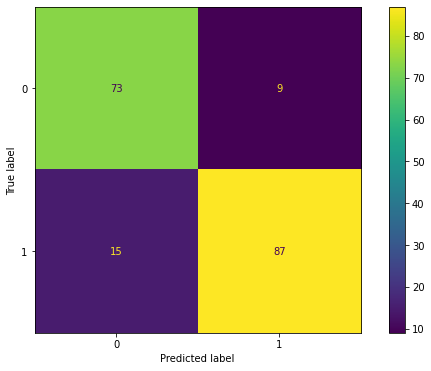

In [163]:
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val = (y_train, y_train_pred, y_test, y_pred)

In [164]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.10831369, 0.89168631],
       [0.33176001, 0.66823999],
       [0.97663451, 0.02336549],
       [0.02151586, 0.97848414],
       [0.07095834, 0.92904166],
       [0.7571455 , 0.2428545 ],
       [0.29716365, 0.70283635],
       [0.0758886 , 0.9241114 ],
       [0.93037989, 0.06962011],
       [0.71358672, 0.28641328],
       [0.04274107, 0.95725893],
       [0.39650333, 0.60349667],
       [0.03854   , 0.96146   ],
       [0.98580792, 0.01419208],
       [0.27765429, 0.72234571],
       [0.55601354, 0.44398646],
       [0.96046762, 0.03953238],
       [0.23276248, 0.76723752],
       [0.94537578, 0.05462422],
       [0.11013813, 0.88986187],
       [0.26764531, 0.73235469],
       [0.18581953, 0.81418047],
       [0.21882359, 0.78117641],
       [0.64214144, 0.35785856],
       [0.05639916, 0.94360084],
       [0.97970817, 0.02029183],
       [0.97349725, 0.02650275],
       [0.41990361, 0.58009639],
       [0.08650952, 0.91349048],
       [0.92219188, 0.07780812],
       [0.

In [165]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
424   60        120            0          1    141    2.000      1   
636   48        130          245          0    180    0.200      1   
604   68        134          254          1    151    0.000      1   
615   70        130          322          0    109    2.400      1   
38    48        120          177          1    148    0.000      0   
408   59        110            0          1     94    0.000      1   
58    54        150          365          0    134    1.000      1   
752   56        125          249          1    144    1.200      1   
516   68        150          195          1    132    0.000      1   
555   58        150          219          0    118    0.000      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
424                  0                  1                 0   
636                  1                  0                 0   
604                  0                  1                 0   
615                  0                  0                 0   
38                   1                  0                 0   
408                  0                  0                 0   
58                   0                  0                 0   
752                  0                  0                 0   
516                  0                  1                 0   
555                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
424                  1              0                 1              0   
636                  0              0                 0              1   
604                  1              0                 1              0   
615                  0              0                 0              1   
38                   0              1                 0              0   
408                  1              0                 0              1   
58                   0              1                 0              0   
752                  0              0                 1              1   
516                  1              0                 0              1   
555                  0              1                 1              1   

     ST_Slope_Up  HeartDisease  pred  pred_proba  
424            1             1     1       0.680  
636            0             0     0       0.418  
604            1             0     0       0.444  
615            0             1     1       0.889  
38             1             0     0       0.059  
408            0             1     1       0.962  
58             1             0     0       0.243  
752            0             1     1       0.975  
516            0             1     1       0.799  
555            0             1     1       0.773

##### Cross-Validating Logistic Regression (LR) Model

In [166]:
log_xvalid_model = LogisticRegression()

log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                          'f1'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))

log_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.020       0.006          0.905           0.905        0.927    0.916
2      0.017       0.005          0.892           0.902        0.902    0.902
3      0.015       0.004          0.811           0.846        0.805    0.825
4      0.015       0.007          0.824           0.833        0.854    0.843
5      0.015       0.004          0.849           0.837        0.900    0.867
6      0.013       0.004          0.822           0.800        0.900    0.847
7      0.013       0.004          0.863           0.826        0.950    0.884
8      0.016       0.007          0.863           0.875        0.875    0.875
9      0.032       0.005          0.877           0.900        0.878    0.889
10     0.026       0.005          0.863           0.830        0.951    0.886

In [167]:
log_xvalid_model_scores.mean()[2:]

test_accuracy    0.857
test_precision   0.855
test_recall      0.894
test_f1          0.873
dtype: float64

##### Modelling Logistic Regression (LR) with Best Parameters Using GridSeachCV

In [168]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [169]:
LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [170]:
LR_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.6842

Let's look at the best parameters & estimator found by GridSearchCV.

In [171]:
print(colored('\033[1mBest Parameters of GridSearchCV for LR Model:\033[0m', 'green'), colored(LR_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for LR Model:\033[0m', 'green'), colored(LR_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for LR Model: {'C': 37.926901907322495, 'l1_ratio': 0.0, 'penalty': 'l1'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for LR Model: LogisticRegression(C=37.926901907322495, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.0,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


[[72 10]
 [19 83]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        82
           1       0.89      0.81      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

--------------------------------------------------------


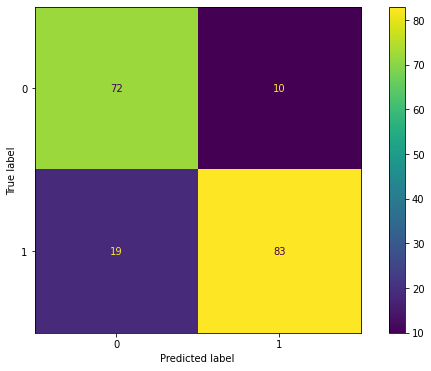

In [172]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

###### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

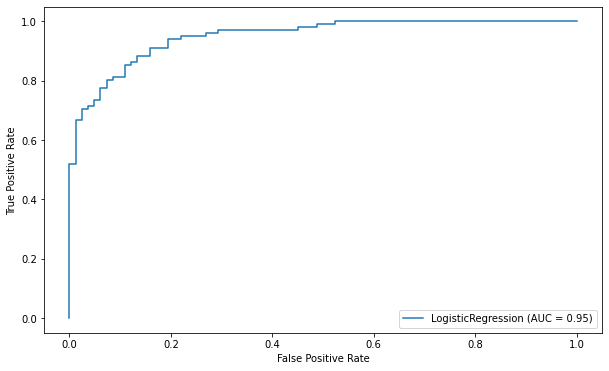

In [173]:
plot_roc_curve(LR_model, X_test_scaled, y_test, response_method='auto');

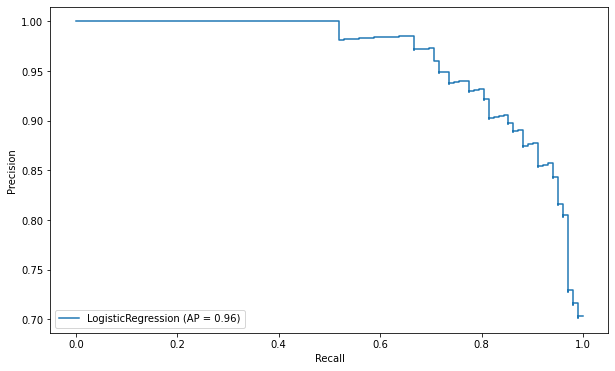

In [174]:
plot_precision_recall_curve(LR_model, X_test_scaled, y_test);

##### The Determination of The Optimal Treshold

In [175]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [176]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.32809707932824683

In [177]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
hd_roc_curve = pd.DataFrame(roc_curve)
hd_roc_curve

fp_rate  tp_rate  thresholds
0     0.000    0.000       1.983
1     0.000    0.010       0.983
2     0.000    0.520       0.854
3     0.012    0.520       0.837
4     0.012    0.667       0.758
5     0.024    0.667       0.732
6     0.024    0.706       0.722
7     0.037    0.706       0.722
8     0.037    0.716       0.721
9     0.049    0.716       0.715
10    0.049    0.735       0.706
11    0.061    0.735       0.703
12    0.061    0.775       0.668
13    0.073    0.775       0.627
14    0.073    0.804       0.603
15    0.085    0.804       0.600
16    0.085    0.814       0.596
17    0.110    0.814       0.580
18    0.110    0.853       0.520
19    0.122    0.853       0.476
20    0.122    0.863       0.452
21    0.134    0.863       0.444
22    0.134    0.882       0.435
23    0.159    0.882       0.418
24    0.159    0.912       0.328
25    0.195    0.912       0.317
26    0.195    0.941       0.286
27    0.220    0.941       0.260
28    0.220    0.951       0.251
29    0.268    0.951       0.238
30    0.268    0.961       0.228
31    0.293    0.961       0.212
32    0.293    0.971       0.193
33    0.451    0.971       0.131
34    0.451    0.980       0.125
35    0.488    0.980       0.108
36    0.488    0.990       0.106
37    0.524    0.990       0.099
38    0.524    1.000       0.098
39    1.000    1.000       0.014

In [178]:
hd_roc_curve.iloc[optimal_idx]

fp_rate      0.159
tp_rate      0.912
thresholds   0.328
Name: 24, dtype: float64

#### The Implementation of Support Vector Machine (SVM)

In [179]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score>

##### Modelling Support Vector Machine (SVM) with Default Parameters

[[71 11]
 [12 90]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


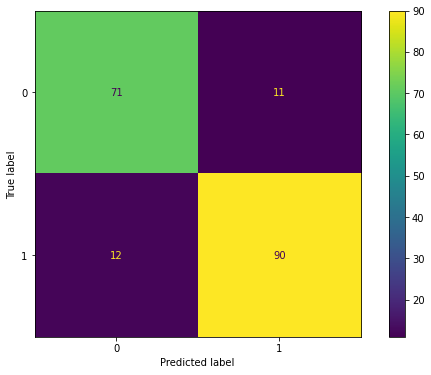

In [180]:
SVM_model = SVC(random_state=42)
SVM_model.fit(X_train_scaled, y_train)
y_pred = SVM_model.predict(X_test_scaled)
y_train_pred = SVM_model.predict(X_train_scaled)

svm_f1 = f1_score(y_test, y_pred)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

###### Cross-checking the model by predictions in Train Set for consistency

[[273  55]
 [ 32 374]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       328
           1       0.87      0.92      0.90       406

    accuracy                           0.88       734
   macro avg       0.88      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734

--------------------------------------------------------


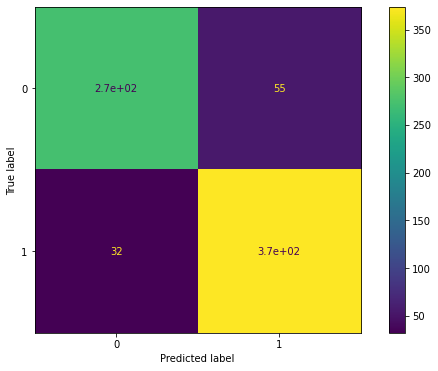

In [181]:
y_train_pred = SVM_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_train_scaled, y_train);

In [182]:
#visualizer = ClassPredictionError(SVM_model)

# Fit the training data to the visualizer
#visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
#visualizer.score(X_test_scaled, y_test)

# Draw visualization
#visualizer.poof();

##### Cross-Validating Support Vector Machine (SVM) Model

In [183]:
svm_xvalid_model = SVC()

svm_xvalid_model_scores = cross_validate(svm_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
svm_xvalid_model_scores = pd.DataFrame(svm_xvalid_model_scores, index = range(1, 11))

svm_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.018       0.004          0.932           0.909        0.976    0.941
2      0.020       0.008          0.892           0.923        0.878    0.900
3      0.019       0.004          0.811           0.846        0.805    0.825
4      0.013       0.004          0.824           0.818        0.878    0.847
5      0.015       0.005          0.863           0.841        0.925    0.881
6      0.014       0.004          0.822           0.787        0.925    0.851
7      0.014       0.004          0.863           0.841        0.925    0.881
8      0.013       0.004          0.863           0.875        0.875    0.875
9      0.014       0.004          0.863           0.897        0.854    0.875
10     0.014       0.004          0.863           0.844        0.927    0.884

In [184]:
svm_xvalid_model_scores.mean()[2:]

test_accuracy    0.860
test_precision   0.858
test_recall      0.897
test_f1          0.876
dtype: float64

##### Modelling Support Vector Machine (SVM) with Best Parameters Using GridSeachCV

In [185]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [186]:
SVM_grid_model = SVC(random_state=1)

SVM_grid_model = GridSearchCV(SVM_grid_model, param_grid, verbose=3, refit=True)

In [187]:
SVM_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.898, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.789, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.789, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.878, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.849, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.912, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.776, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.789, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.857, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=auto, kernel=rbf, score=0.815, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.912, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .... C=0.1, gamma=auto, kernel=linear, score=0.796, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   26.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

###### A look at the best parameters & estimator found by GridSearchCV.

[[70 12]
 [11 91]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

--------------------------------------------------------


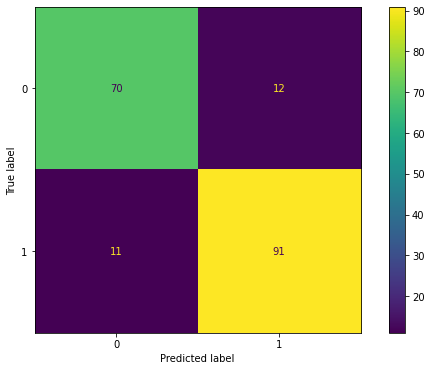

In [188]:
y_pred = SVM_grid_model.predict(X_test_scaled)
y_train_pred = SVM_grid_model.predict(X_train_scaled)

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_acc = accuracy_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_grid_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

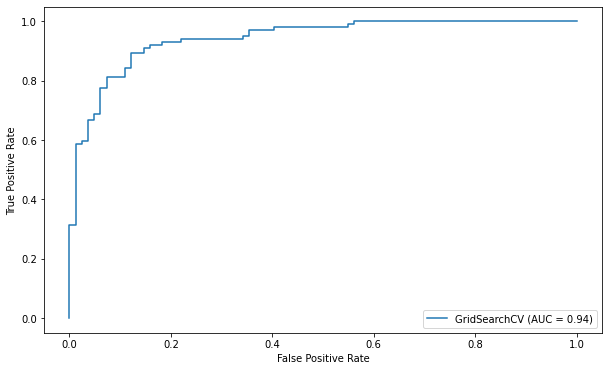

In [189]:
plot_roc_curve(SVM_grid_model, X_test_scaled, y_test);

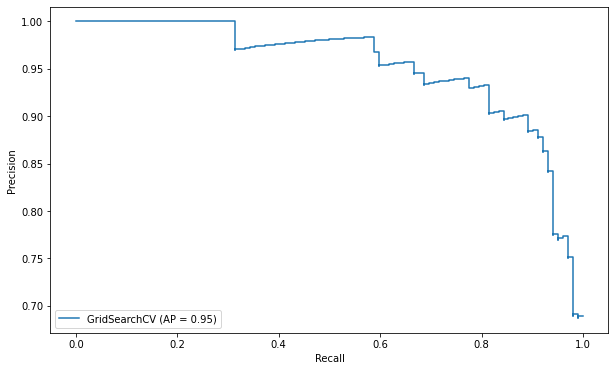

In [190]:
plot_precision_recall_curve(SVM_grid_model, X_test_scaled, y_test);

##### The Implementation of Decision Tree (DT)

### Modelling Decision Tree (DT) with Default Parameters

[[66 16]
 [17 85]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.84      0.83      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

--------------------------------------------------------


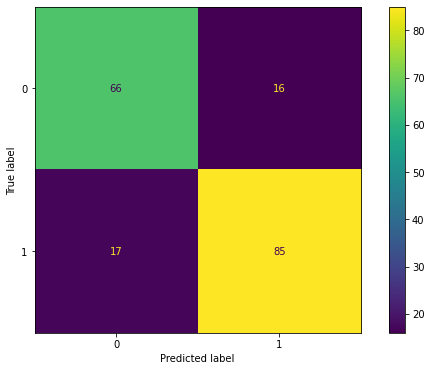

In [191]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=1)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

###### Cross-Validating Decision Tree (DT)

In [192]:
dt_xvalid_model = DecisionTreeClassifier(max_depth=None, random_state=1)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.007       0.004          0.838           0.854        0.854    0.854
2      0.003       0.003          0.797           0.842        0.780    0.810
3      0.004       0.004          0.716           0.794        0.659    0.720
4      0.005       0.003          0.770           0.786        0.805    0.795
5      0.003       0.003          0.781           0.833        0.750    0.789
6      0.004       0.003          0.767           0.756        0.850    0.800
7      0.004       0.003          0.849           0.837        0.900    0.867
8      0.003       0.003          0.781           0.786        0.825    0.805
9      0.003       0.003          0.849           0.875        0.854    0.864
10     0.003       0.003          0.781           0.805        0.805    0.805

In [193]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy    0.793
test_precision   0.817
test_recall      0.808
test_f1          0.811
dtype: float64

##### Modelling Decision Tree (DT) with Best Parameters Using GridSeachCV

In [194]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [195]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4284 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:   18.9s finished


In [196]:
print(colored('\033[1mBest Parameters of GridSearchCV for Decision Tree Model:\033[0m', 'green'), colored(DT_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Decision Tree Model:\033[0m', 'green'), colored(DT_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Decision Tree Model: {'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 15, 'splitter': 'best'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Decision Tree Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 4540 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:   19.3s finished


[[71 11]
 [18 84]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        82
           1       0.88      0.82      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

--------------------------------------------------------


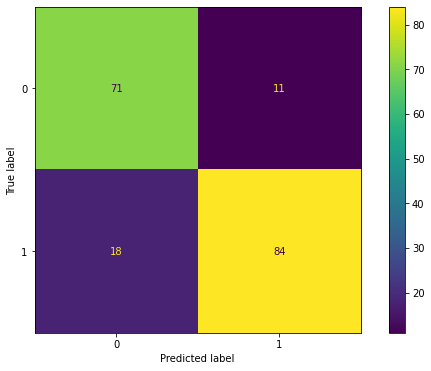

In [197]:
DT_grid_model.fit(X_train_scaled, y_train)
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_grid_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### Feature Importance for Decision Tree (DT) Model

In [198]:
DT_model.feature_importances_

array([0.04837427, 0.07322165, 0.1094811 , 0.02424478, 0.12411163,
       0.0726494 , 0.03108158, 0.02800341, 0.03548515, 0.00952615,
       0.01119084, 0.01126524, 0.03844378, 0.        , 0.38292101])

In [199]:
DT_feature_imp = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
DT_feature_imp

Feature Importance
ST_Slope_Flat                   0.000
ChestPainType_TA                0.010
RestingECG_Normal               0.011
RestingECG_ST                   0.011
FastingBS                       0.024
ChestPainType_ATA               0.028
Sex_M                           0.031
ChestPainType_NAP               0.035
ExerciseAngina_Y                0.038
Age                             0.048
Oldpeak                         0.073
RestingBP                       0.073
Cholesterol                     0.109
MaxHR                           0.124
ST_Slope_Up                     0.383

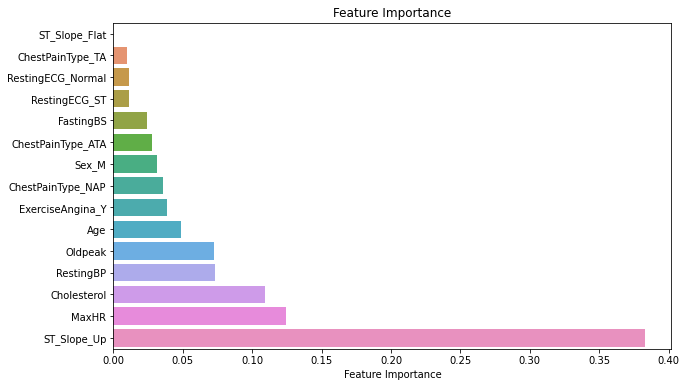

In [200]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

The feature that weighs too much on the estimation can SOMETIMES cause overfitting. We are curious about what happens to our model if we drop the feature with contribution. For this reason, the most important feature will be dropped and the scores will be checked again.

In [201]:
X1 = X.drop(columns = ["ST_Slope_Up"])
y1 = hd["HeartDisease"]

In [202]:
X1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

In [203]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=1)

In [204]:
operations = [("scaler", MinMaxScaler()),
              ("dt", DecisionTreeClassifier(class_weight="balanced", random_state=1))]

In [205]:
DT_pipe_model = Pipeline(steps=operations)
DT_pipe_model.get_params()
DT_pipe_model.fit(X1_train, y1_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter='best'))],
         verbose=False)

In [206]:
y1_pred = DT_pipe_model.predict(X1_test)
y1_train_pred = DT_pipe_model.predict(X1_train)

In [207]:
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[43 14]
 [19 62]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        57
           1       0.82      0.77      0.79        81

    accuracy                           0.76       138
   macro avg       0.75      0.76      0.76       138
weighted avg       0.77      0.76      0.76       138



##### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

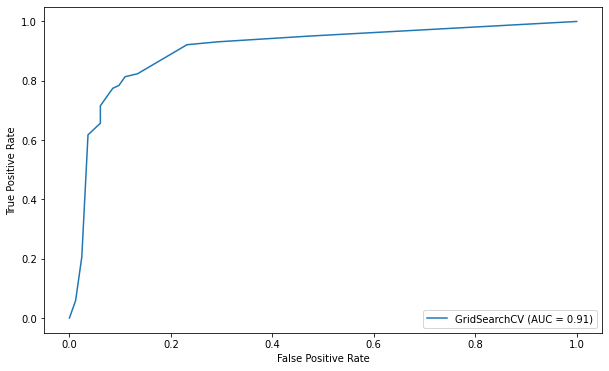

In [208]:
plot_roc_curve(DT_grid_model, X_test_scaled, y_test);

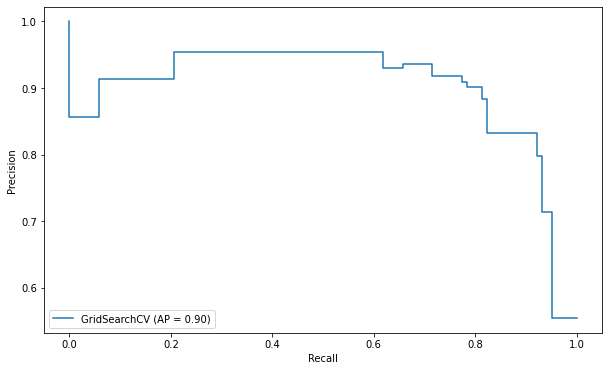

In [209]:
plot_precision_recall_curve(DT_grid_model, X_test_scaled, y_test);

##### Modelling Random Forest (RF) with Default Parameters

[[73  9]
 [13 89]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.91      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


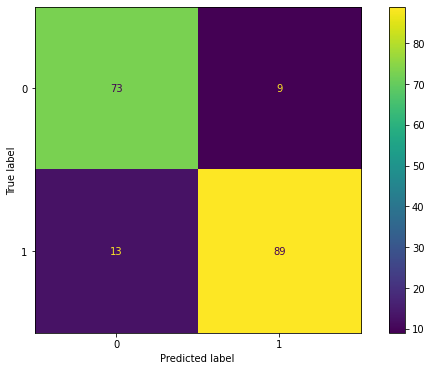

In [210]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### Cross-Validating Random Forest (RF)

In [211]:
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=1)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.182       0.012          0.919           0.907        0.951    0.929
2      0.178       0.012          0.932           0.909        0.976    0.941
3      0.197       0.021          0.811           0.829        0.829    0.829
4      0.180       0.013          0.865           0.830        0.951    0.886
5      0.184       0.013          0.863           0.857        0.900    0.878
6      0.198       0.016          0.822           0.814        0.875    0.843
7      0.210       0.013          0.890           0.864        0.950    0.905
8      0.203       0.013          0.849           0.837        0.900    0.867
9      0.198       0.015          0.877           0.900        0.878    0.889
10     0.202       0.014          0.849           0.857        0.878    0.867

In [212]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy    0.868
test_precision   0.860
test_recall      0.909
test_f1          0.884
dtype: float64

In [213]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [214]:
RF_grid_model = RandomForestClassifier(random_state=1)

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)  # Whatch out, fit() can also be used here

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.0min finished


In [215]:
print(colored('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Random Forest Model: {'max_depth': 5, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Random Forest Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


[[71 11]
 [11 91]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


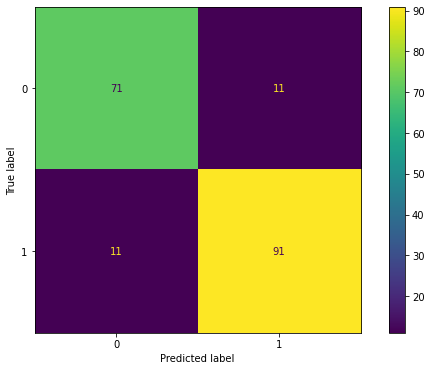

In [216]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_grid_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### Feature Importance for Random Forest (RF) Model

In [217]:
RF_model.feature_importances_

array([0.0799864 , 0.07320599, 0.10868237, 0.02624936, 0.11258255,
       0.12244419, 0.04121718, 0.02966638, 0.02270857, 0.01108891,
       0.01980964, 0.01070225, 0.0821129 , 0.10476759, 0.15477573])

In [218]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp

Feature Importance
ST_Slope_Up                     0.155
Oldpeak                         0.122
MaxHR                           0.113
Cholesterol                     0.109
ST_Slope_Flat                   0.105
ExerciseAngina_Y                0.082
Age                             0.080
RestingBP                       0.073
Sex_M                           0.041
ChestPainType_ATA               0.030
FastingBS                       0.026
ChestPainType_NAP               0.023
RestingECG_Normal               0.020
ChestPainType_TA                0.011
RestingECG_ST                   0.011

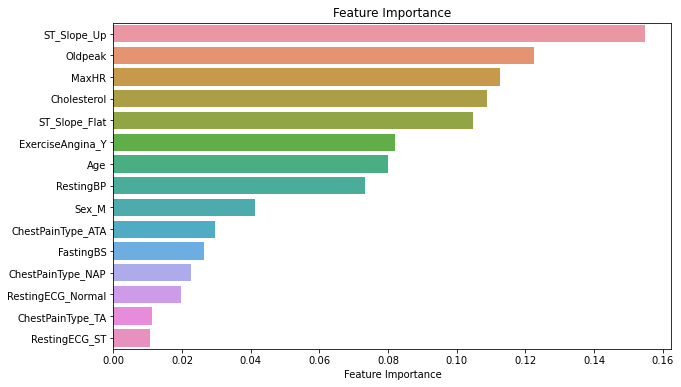

In [219]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

##### Let's compare the results with the ones found via Decision Tree.

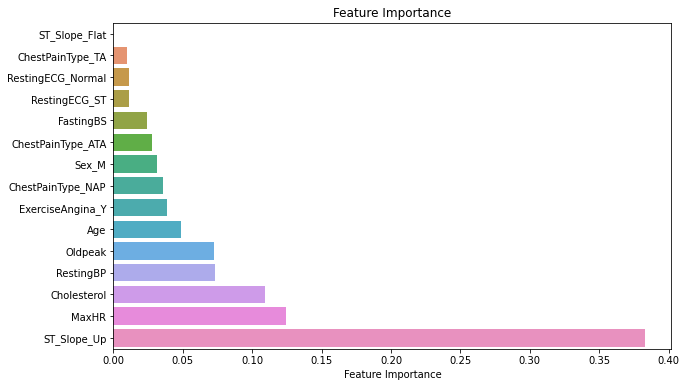

In [220]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

##### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

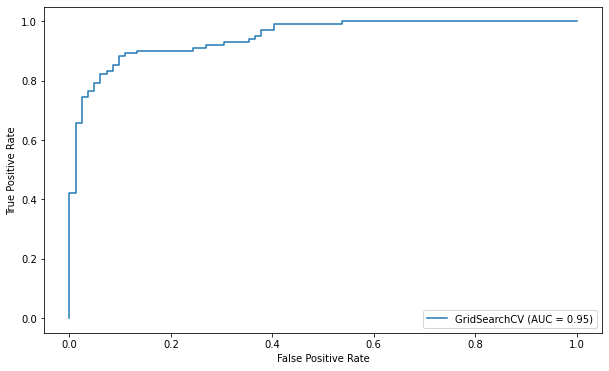

In [221]:
plot_roc_curve(RF_grid_model, X_test_scaled, y_test);

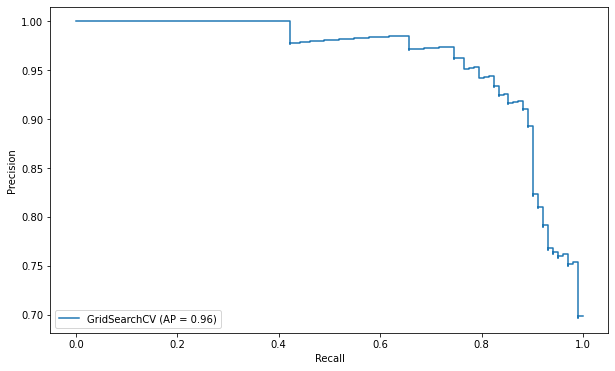

In [222]:
plot_precision_recall_curve(RF_grid_model, X_test_scaled, y_test);

##### The Visualization of the Tree

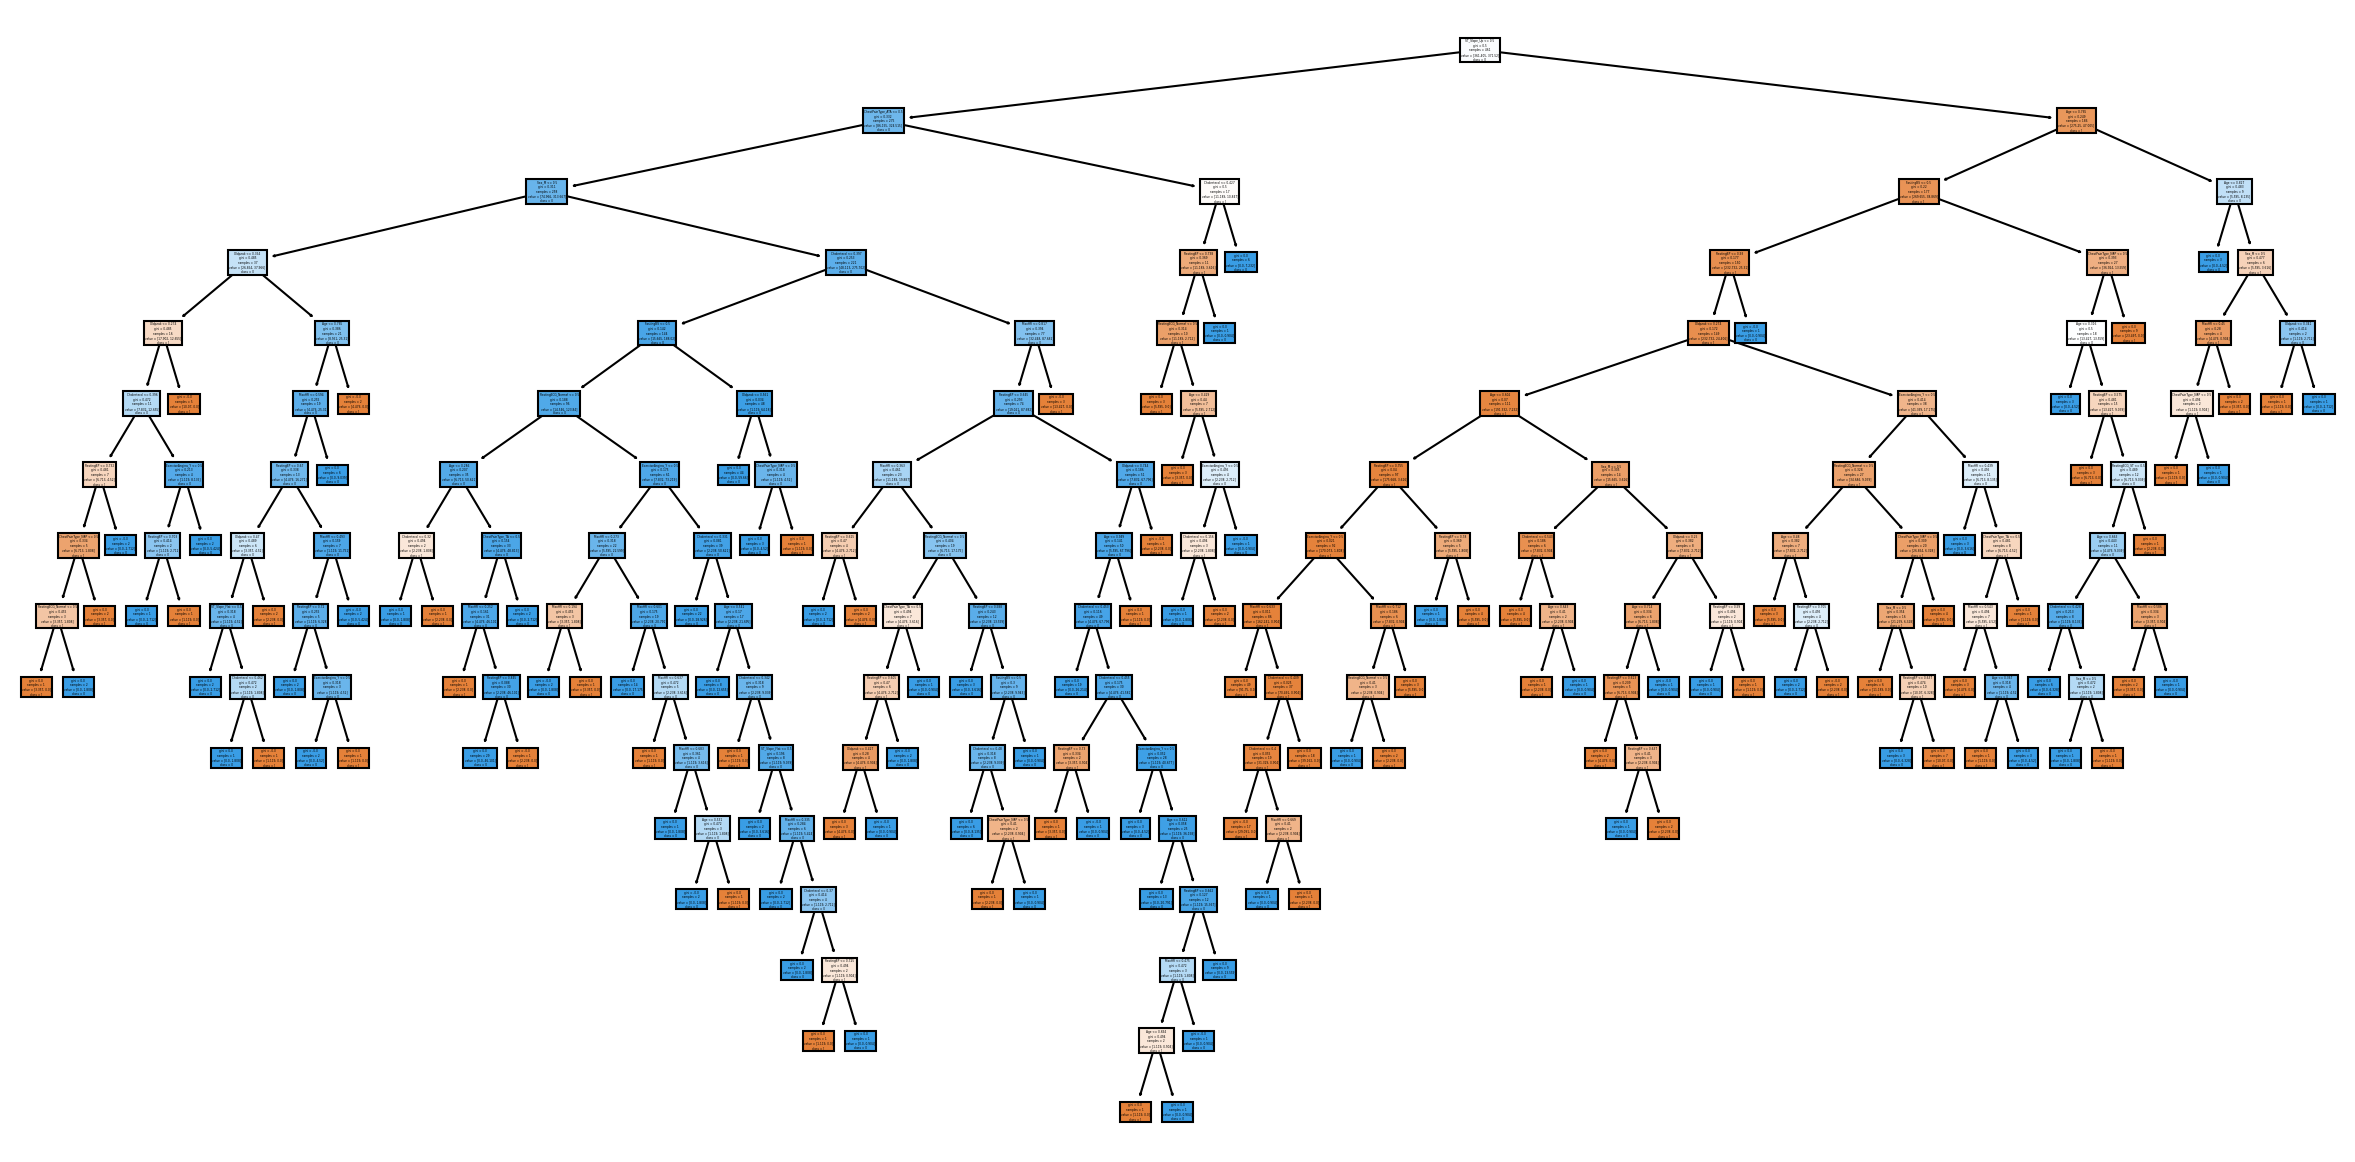

In [223]:
features = list(X.columns)
targets = str(hd.HeartDisease.unique())

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=150)
plot_tree(RF_model.estimators_[0],
          feature_names = features,
          class_names=targets,
          filled = True);

##### Modelling K-Nearest Neighbor (KNN) with Default Parameters

[[72 10]
 [12 90]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.90      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


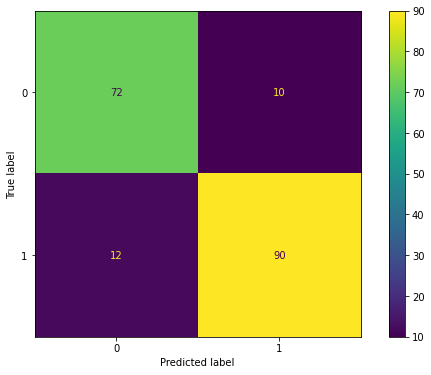

In [224]:
KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

In [225]:
y_pred_proba = KNN_model.predict_proba(X_test_scaled)
y_pred_proba
pd.DataFrame(y_pred_proba)

0     1
0   0.000 1.000
1   0.200 0.800
2   1.000 0.000
3   0.000 1.000
4   0.200 0.800
..    ...   ...
179 1.000 0.000
180 0.000 1.000
181 1.000 0.000
182 1.000 0.000
183 0.800 0.200

[184 rows x 2 columns]

In [226]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(5)

Actual  Pred  Proba_1  Proba_0
773       0     1    0.600    0.400
832       0     0    0.200    0.800
295       1     1    0.800    0.200
900       1     1    0.800    0.200
916       1     0    0.200    0.800

##### Cross-Validating K-Nearest Neighbor (KNN)

In [227]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=5)

knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train_scaled, y_train, 
                                         scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
knn_xvalid_model_scores = pd.DataFrame(knn_xvalid_model_scores, index = range(1, 11))

knn_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.002       0.013          0.905           0.886        0.951    0.918
2      0.002       0.013          0.878           0.900        0.878    0.889
3      0.002       0.013          0.838           0.872        0.829    0.850
4      0.002       0.008          0.838           0.837        0.878    0.857
5      0.002       0.007          0.849           0.837        0.900    0.867
6      0.002       0.008          0.836           0.792        0.950    0.864
7      0.002       0.008          0.836           0.792        0.950    0.864
8      0.002       0.008          0.863           0.875        0.875    0.875
9      0.001       0.189          0.890           0.923        0.878    0.900
10     0.002       0.007          0.836           0.809        0.927    0.864

In [228]:
knn_xvalid_model_scores.mean()[2:]

test_accuracy    0.857
test_precision   0.852
test_recall      0.902
test_f1          0.875
dtype: float64

##### Elbow Method for Choosing Reasonable K Values

In [229]:
test_error_rates = []


for k in range(1, 10):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [230]:
test_error_rates

[0.19021739130434778,
 0.21739130434782605,
 0.14130434782608692,
 0.1467391304347826,
 0.11956521739130432,
 0.13043478260869568,
 0.125,
 0.14130434782608692,
 0.13043478260869568]

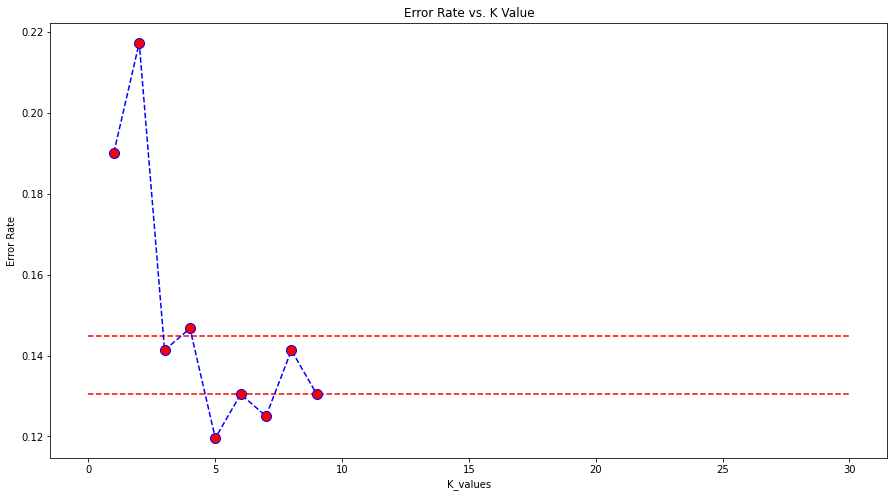

In [231]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10), test_error_rates,
         color='blue', linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14492753623188404, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13043478260869568, xmin=0, xmax=30, colors='r', linestyles="--");

##### GridsearchCV for Choosing Reasonable K Values

In [232]:
k_values= range(1, 10)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [233]:
KNN_grid = KNeighborsClassifier()
KNN_grid

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [234]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')
KNN_grid_model

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [235]:
KNN_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

##### looking at the best parameters & estimator found by GridSearchCV.

In [236]:
print(colored('\033[1mBest Parameters of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for KNN Model: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for KNN Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


WITH K=26
-------------------
[[72 10]
 [12 90]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.90      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


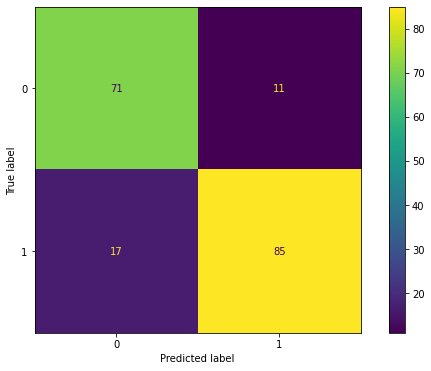

In [237]:
# NOW WITH K=26

KNN_model = KNeighborsClassifier(n_neighbors=26, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn26_f1 = f1_score(y_test, y_pred)
knn26_acc = accuracy_score(y_test, y_pred)
knn26_recall = recall_score(y_test, y_pred)
knn26_auc = roc_auc_score(y_test, y_pred)

print('WITH K=26')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

WITH K=13
-------------------
[[72 10]
 [12 90]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.90      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


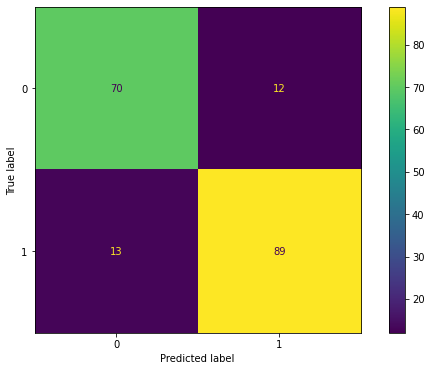

In [238]:
# NOW WITH K=13

KNN_model = KNeighborsClassifier(n_neighbors=13, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn13_f1 = f1_score(y_test, y_pred)
knn13_acc = accuracy_score(y_test, y_pred)
knn13_recall = recall_score(y_test, y_pred)
knn13_auc = roc_auc_score(y_test, y_pred)

print('WITH K=13')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

###### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

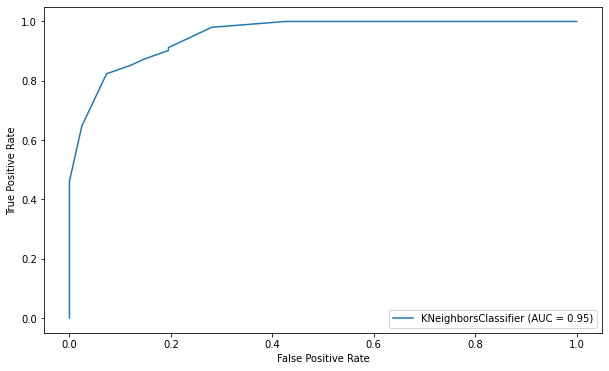

In [239]:
plot_roc_curve(KNN_model, X_test_scaled, y_test);

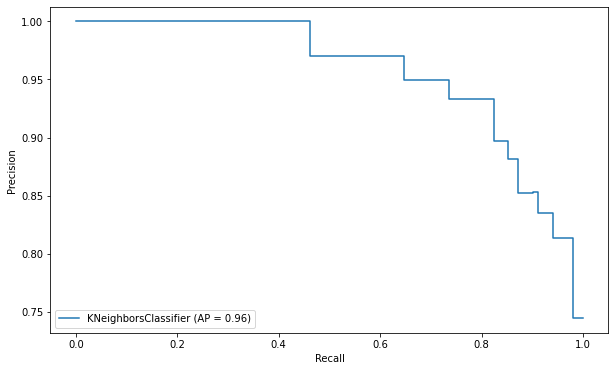

In [240]:
plot_precision_recall_curve(KNN_model, X_test_scaled, y_test);

##### Modelling GradientBoosting (GB) with Default Parameters

<IPython.core.display.Javascript object>

[[72 10]
 [12 90]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.90      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


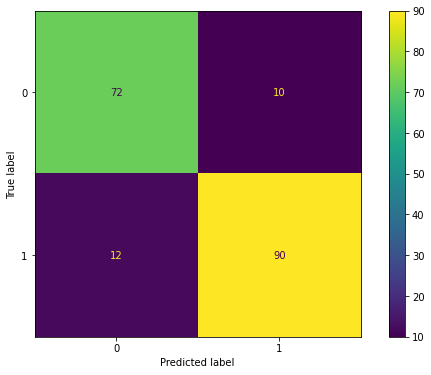

In [241]:
GB_model = GradientBoostingClassifier(random_state=1)
GB_model.fit(X_train_scaled, y_train)
y_pred = GB_model.predict(X_test_scaled)
y_train_pred = GB_model.predict(X_train_scaled)

gb_f1 = f1_score(y_test, y_pred)
gb_acc = accuracy_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

Cross-checking the model by predictions in Train Set for consistency

[[304  24]
 [ 20 386]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       328
           1       0.94      0.95      0.95       406

    accuracy                           0.94       734
   macro avg       0.94      0.94      0.94       734
weighted avg       0.94      0.94      0.94       734

--------------------------------------------------------


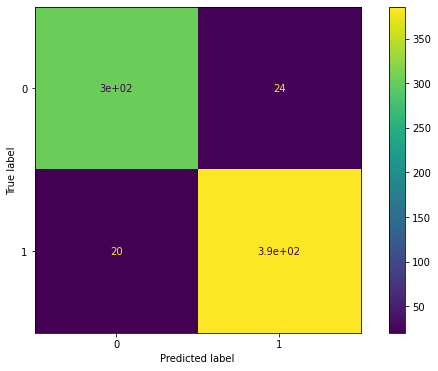

In [242]:
y_train_pred = GB_model.predict(X_train_scaled)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_model, X_train_scaled, y_train);

###### Cross-Validating GradientBoosting (GB)

In [243]:
gb_xvalid_model = GradientBoostingClassifier(random_state=42)

gb_xvalid_model_scores = cross_validate(gb_xvalid_model, X_train_scaled, y_train,
                                        scoring = ["accuracy", "precision_macro", 
                                                   "recall_macro", "f1_macro"], cv = 10)
gb_xvalid_model_scores = pd.DataFrame(gb_xvalid_model_scores, index = range(1, 11))

gb_xvalid_model_scores

<IPython.core.display.Javascript object>

fit_time  score_time  test_accuracy  test_precision_macro  \
1      0.168       0.004          0.946                 0.949   
2      0.140       0.003          0.892                 0.891   
3      0.164       0.003          0.797                 0.795   
4      0.150       0.004          0.838                 0.842   
5      0.142       0.003          0.808                 0.808   
6      0.145       0.003          0.849                 0.852   
7      0.141       0.003          0.877                 0.880   
8      0.139       0.003          0.863                 0.864   
9      0.144       0.003          0.890                 0.889   
10     0.154       0.003          0.877                 0.874   

    test_recall_macro  test_f1_macro  
1               0.942          0.945  
2               0.891          0.891  
3               0.796          0.795  
4               0.830          0.833  
5               0.804          0.805  
6               0.844          0.846  
7               0.872          0.874  
8               0.859          0.861  
9               0.889          0.889  
10              0.877          0.875

In [244]:
gb_xvalid_model_scores.mean()

fit_time               0.149
score_time             0.003
test_accuracy          0.864
test_precision_macro   0.864
test_recall_macro      0.860
test_f1_macro          0.862
dtype: float64

##### Feature Importance for GradientBoosting (GB) Model

In [245]:
GB_model.feature_importances_

array([0.02469795, 0.04312976, 0.11906973, 0.02264488, 0.07403909,
       0.07306722, 0.04262172, 0.02299969, 0.02834349, 0.01051711,
       0.00493641, 0.00257344, 0.05879646, 0.01381976, 0.45874329])

In [246]:
GB_feature_imp = pd.DataFrame(index = X.columns,
                              data = GB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance",ascending = False)
GB_feature_imp

Feature Importance
ST_Slope_Up                     0.459
Cholesterol                     0.119
MaxHR                           0.074
Oldpeak                         0.073
ExerciseAngina_Y                0.059
RestingBP                       0.043
Sex_M                           0.043
ChestPainType_NAP               0.028
Age                             0.025
ChestPainType_ATA               0.023
FastingBS                       0.023
ST_Slope_Flat                   0.014
ChestPainType_TA                0.011
RestingECG_Normal               0.005
RestingECG_ST                   0.003

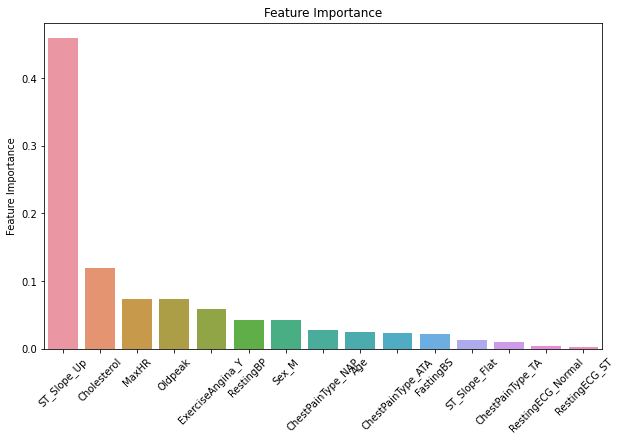

In [247]:
sns.barplot(y=GB_feature_imp["Feature Importance"], x=GB_feature_imp.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

##### Modelling GradientBoosting (GB) Model with Best Parameters Using GridSeachCV

In [248]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

<IPython.core.display.Javascript object>

Learning rate:  0.05
Accuracy score (training): 0.864
Accuracy score (test): 0.864



<IPython.core.display.Javascript object>

Learning rate:  0.1
Accuracy score (training): 0.892
Accuracy score (test): 0.870



<IPython.core.display.Javascript object>

Learning rate:  0.15
Accuracy score (training): 0.910
Accuracy score (test): 0.897



<IPython.core.display.Javascript object>

Learning rate:  0.25
Accuracy score (training): 0.918
Accuracy score (test): 0.891



<IPython.core.display.Javascript object>

Learning rate:  0.5
Accuracy score (training): 0.950
Accuracy score (test): 0.870



<IPython.core.display.Javascript object>

Learning rate:  0.6
Accuracy score (training): 0.963
Accuracy score (test): 0.880



<IPython.core.display.Javascript object>

Learning rate:  0.75
Accuracy score (training): 0.959
Accuracy score (test): 0.864



<IPython.core.display.Javascript object>

Learning rate:  0.85
Accuracy score (training): 0.973
Accuracy score (test): 0.864



<IPython.core.display.Javascript object>

Learning rate:  1
Accuracy score (training): 0.969
Accuracy score (test): 0.837



In [249]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}  # 'max_depth':[3,4,5,6]

In [250]:
GB_grid_model = GradientBoostingClassifier(random_state=12)

GB_grid_model = GridSearchCV(GB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.4min finished


##### look at the best parameters & estimator found by GridSearchCV.

In [251]:
print(colored('\033[1mBest Parameters of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 0.2, 'max_features': 2, 'n_estimators': 100, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Gradient Boosting Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=

[[41 41]
 [ 6 96]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.50      0.64        82
           1       0.70      0.94      0.80       102

    accuracy                           0.74       184
   macro avg       0.79      0.72      0.72       184
weighted avg       0.78      0.74      0.73       184

--------------------------------------------------------


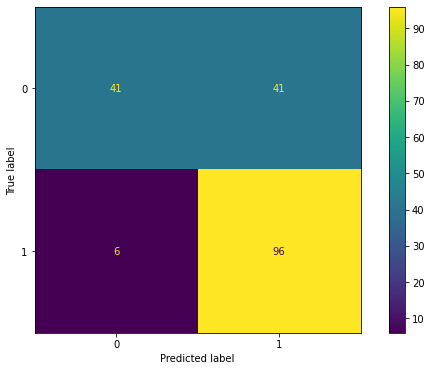

In [252]:
y_pred = GB_grid_model.predict(X_test_scaled)
y_train_pred = GB_grid_model.predict(X_train_scaled)

gb_grid_f1 = f1_score(y_test, y_pred)
gb_grid_acc = accuracy_score(y_test, y_pred)
gb_grid_recall = recall_score(y_test, y_pred)
gb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(GB_grid_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

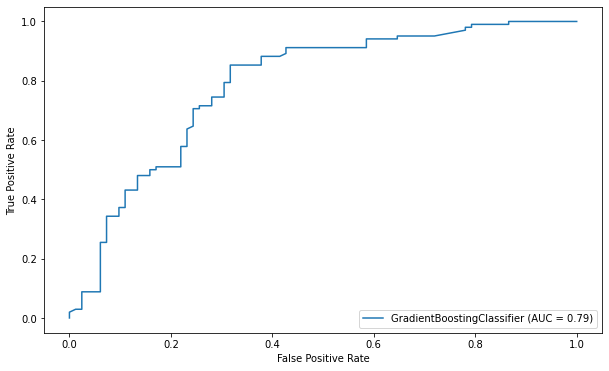

In [253]:
plot_roc_curve(GB_model, X_test, y_test);

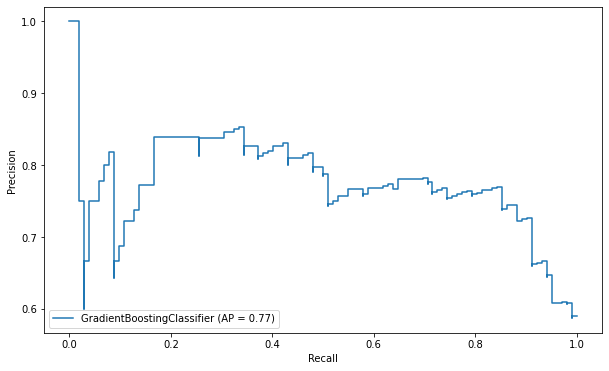

In [254]:
plot_precision_recall_curve(GB_model, X_test, y_test);

##### Modelling AdaBoostingBoosting (AB) with Default Parameters & Model Performance

[[74  8]
 [17 85]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.91      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

--------------------------------------------------------


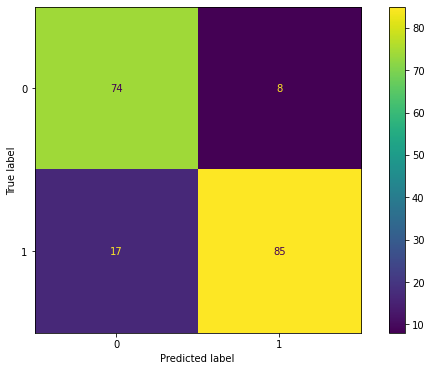

In [255]:
AB_model = AdaBoostClassifier(n_estimators=50, random_state=101)
AB_model.fit(X_train, y_train)
y_pred = AB_model.predict(X_test)
y_train_pred = AB_model.predict(X_train)

ab_f1 = f1_score(y_test, y_pred)
ab_acc = accuracy_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_test, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### Cross-checking the model by predictions in Train Set for consistency

[[281  47]
 [ 39 367]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       328
           1       0.89      0.90      0.90       406

    accuracy                           0.88       734
   macro avg       0.88      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734

--------------------------------------------------------


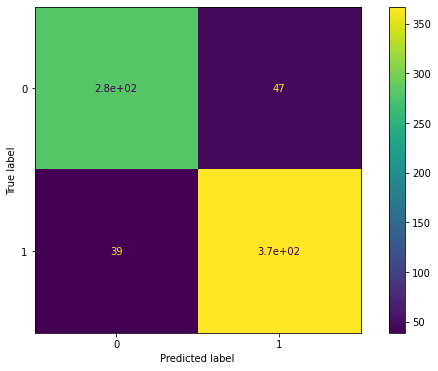

In [256]:
y_train_pred = AB_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

##### Cross-Validating AdaBoostingBoosting (AB)

In [257]:
ab_xvalid_model = AdaBoostClassifier(n_estimators=50, random_state=101)

ab_xvalid_model_scores = cross_validate(ab_xvalid_model, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
ab_xvalid_model_scores = pd.DataFrame(ab_xvalid_model_scores, index = range(1, 11))

ab_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.115       0.012          0.932           0.929        0.951    0.940
2      0.100       0.013          0.892           0.902        0.902    0.902
3      0.092       0.011          0.797           0.842        0.780    0.810
4      0.115       0.013          0.797           0.783        0.878    0.828
5      0.101       0.018          0.795           0.791        0.850    0.819
6      0.093       0.012          0.822           0.829        0.850    0.840
7      0.098       0.013          0.822           0.829        0.850    0.840
8      0.097       0.012          0.849           0.872        0.850    0.861
9      0.106       0.013          0.877           0.921        0.854    0.886
10     0.101       0.013          0.890           0.884        0.927    0.905

In [258]:
ab_xvalid_model_scores.mean()

fit_time         0.102
score_time       0.013
test_accuracy    0.847
test_precision   0.858
test_recall      0.869
test_f1          0.863
dtype: float64

##### The Visualization of the Tree

In [259]:
AB_model = AdaBoostClassifier(n_estimators=3, random_state=42)
AB_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=3, random_state=42)

In [260]:
hd.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

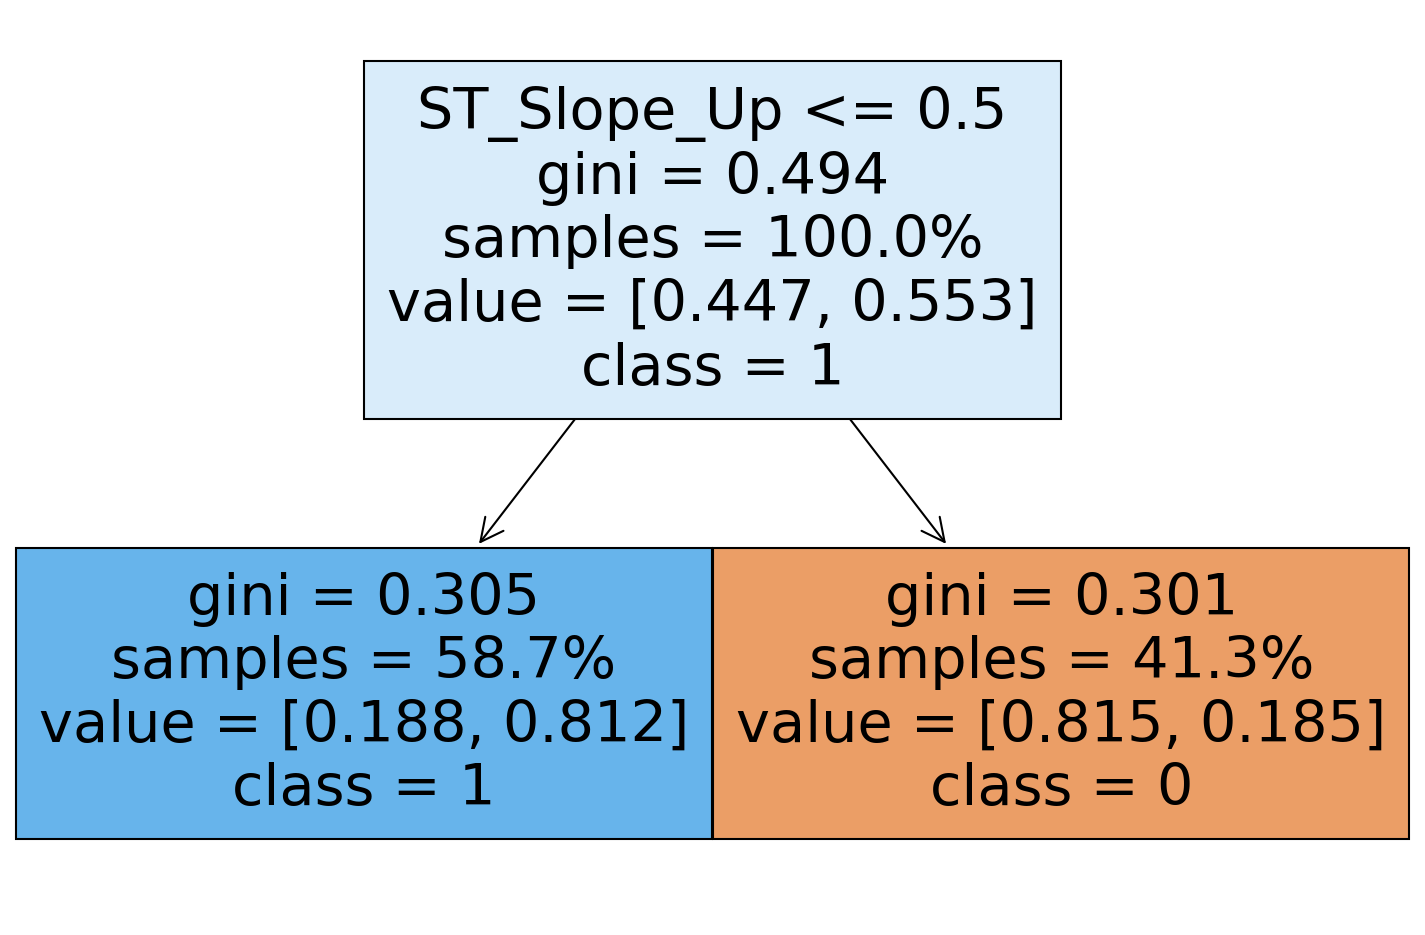

In [261]:
features = list(X.columns)
targets = hd["HeartDisease"].astype("str")

plt.figure(figsize=(12, 8),dpi=150)
plot_tree(AB_model.estimators_[0], filled=True, feature_names=features, class_names=targets.unique(), proportion=True);

###### Analyzing Performance While Weak Learners Are Added

In [262]:
error_rates = []

for n in range(1, 100):
    
    AB_model = AdaBoostClassifier(n_estimators=n)
    AB_model.fit(X_train, y_train)
    preds = AB_model.predict(X_test)
    err = 1 - f1_score(y_test, preds)
    
    error_rates.append(err)

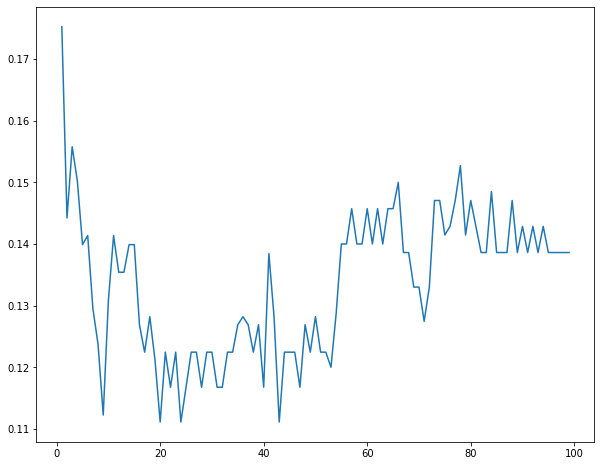

In [263]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 100), error_rates);

##### Feature Importance for AdaBoostingBoosting (AB) Model

In [264]:
AB_model.feature_importances_

array([0.14141414, 0.11111111, 0.27272727, 0.01010101, 0.15151515,
       0.15151515, 0.02020202, 0.03030303, 0.03030303, 0.02020202,
       0.01010101, 0.01010101, 0.02020202, 0.01010101, 0.01010101])

In [265]:
AB_feature_imp = pd.DataFrame(index = X.columns, data = AB_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
AB_feature_imp

Feature Importance
Cholesterol                     0.273
MaxHR                           0.152
Oldpeak                         0.152
Age                             0.141
RestingBP                       0.111
ChestPainType_ATA               0.030
ChestPainType_NAP               0.030
Sex_M                           0.020
ChestPainType_TA                0.020
ExerciseAngina_Y                0.020
FastingBS                       0.010
RestingECG_Normal               0.010
RestingECG_ST                   0.010
ST_Slope_Flat                   0.010
ST_Slope_Up                     0.010

In [266]:
imp_feats = AB_feature_imp.sort_values("Feature Importance")

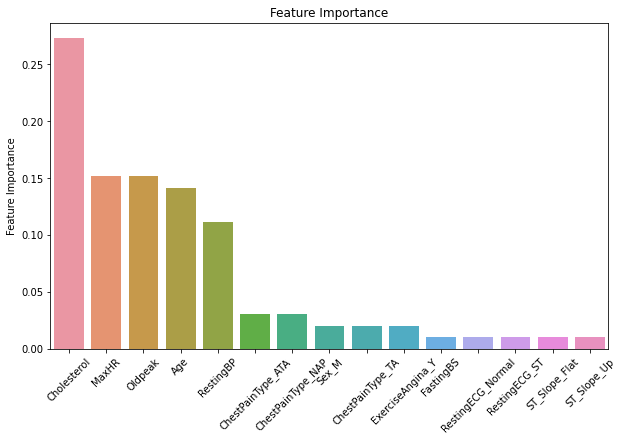

In [267]:
plt.figure(figsize=(10,6))

sns.barplot(y=AB_feature_imp["Feature Importance"], x=AB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

##### Modelling AdaBoosting (AB) with Best Parameters Using GridSearchCV

In [268]:
# Computing the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

for learning_rate in learning_rates:
    ab = AdaBoostClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
    ab.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(ab.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(ab.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.813
Accuracy score (test): 0.815

Learning rate:  0.1
Accuracy score (training): 0.822
Accuracy score (test): 0.832

Learning rate:  0.15
Accuracy score (training): 0.841
Accuracy score (test): 0.837

Learning rate:  0.25
Accuracy score (training): 0.857
Accuracy score (test): 0.859

Learning rate:  0.5
Accuracy score (training): 0.876
Accuracy score (test): 0.864

Learning rate:  0.6
Accuracy score (training): 0.866
Accuracy score (test): 0.875

Learning rate:  0.75
Accuracy score (training): 0.868
Accuracy score (test): 0.859

Learning rate:  0.85
Accuracy score (training): 0.865
Accuracy score (test): 0.875

Learning rate:  1
Accuracy score (training): 0.866
Accuracy score (test): 0.880



In [269]:
param_grid = {"n_estimators": [15, 20, 100, 500], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}

In [270]:
AB_grid_model = AdaBoostClassifier(random_state=42)
AB_grid_model = GridSearchCV(AB_grid_model, param_grid, cv=5, scoring= 'f1')

In [271]:
AB_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25,
                                           1.5],
                         'n_estimators': [15, 20, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

##### looking at the best parameters & estimator found by GridSearchCV.

In [272]:
print(colored('\033[1mBest Parameters of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for AdaBoosting Model:\033[0m', 'blue'), colored(AB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for AdaBoosting Model: {'learning_rate': 0.6, 'n_estimators': 20}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for AdaBoosting Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.6,
                   n_estimators=20, random_state=42)


[[73  9]
 [14 88]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.91      0.86      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


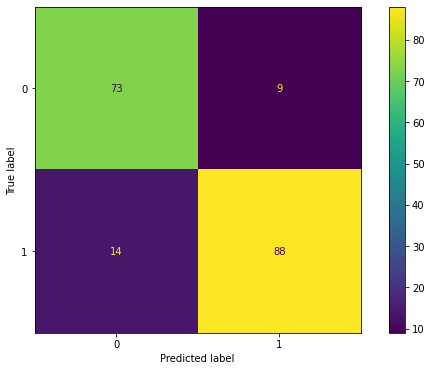

In [273]:
y_pred = AB_grid_model.predict(X_test)
y_train_pred = AB_grid_model.predict(X_train)

ab_grid_f1 = f1_score(y_test, y_pred)
ab_grid_acc = accuracy_score(y_test, y_pred)
ab_grid_recall = recall_score(y_test, y_pred)
ab_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_grid_model, X_test, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

[[274  54]
 [ 44 362]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       328
           1       0.87      0.89      0.88       406

    accuracy                           0.87       734
   macro avg       0.87      0.86      0.86       734
weighted avg       0.87      0.87      0.87       734

--------------------------------------------------------


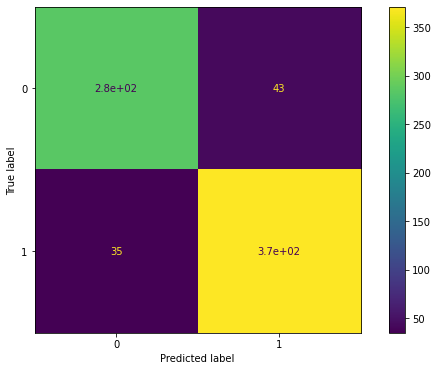

In [274]:
y_train_pred = AB_grid_model.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(AB_model, X_train, y_train);

##### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

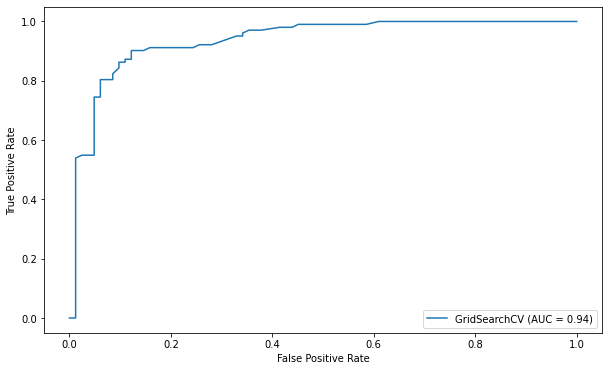

In [275]:
plot_roc_curve(AB_grid_model, X_test, y_test);

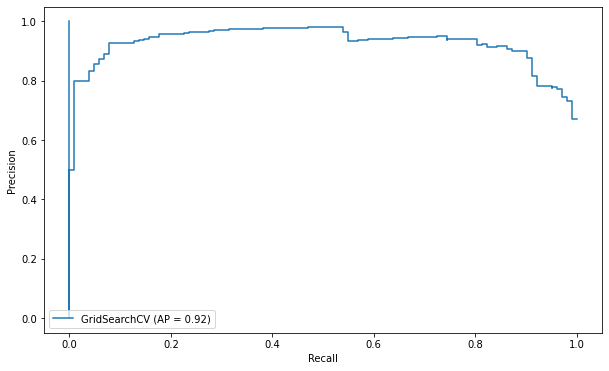

In [276]:
plot_precision_recall_curve(AB_grid_model, X_test, y_test);

###### Modelling XGBoosting (XGB) with Default Parameters & Model Performance

[[76  6]
 [11 91]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        82
           1       0.94      0.89      0.91       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

--------------------------------------------------------


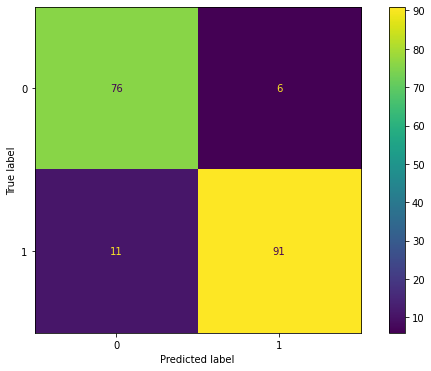

In [277]:
XGB_model = XGBClassifier(random_state=101)
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_train_pred = XGB_model.predict(X_train_scaled)

xgb_f1 = f1_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### Cross-Validating XGBoosting (XGB)

In [278]:
xgb_xvalid_model = XGBClassifier(random_state=1)

xgb_xvalid_model_scores = cross_validate(xgb_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
xgb_xvalid_model_scores = pd.DataFrame(xgb_xvalid_model_scores, index = range(1, 11))

xgb_xvalid_model_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.066       0.004          0.946           0.930        0.976    0.952
2      0.060       0.004          0.892           0.884        0.927    0.905
3      0.057       0.004          0.811           0.846        0.805    0.825
4      0.054       0.005          0.824           0.804        0.902    0.851
5      0.052       0.005          0.849           0.837        0.900    0.867
6      0.064       0.004          0.849           0.854        0.875    0.864
7      0.061       0.004          0.904           0.884        0.950    0.916
8      0.060       0.003          0.877           0.878        0.900    0.889
9      0.056       0.003          0.904           0.925        0.902    0.914
10     0.053       0.003          0.904           0.886        0.951    0.918

In [279]:
xgb_xvalid_model_scores.mean()

fit_time         0.058
score_time       0.004
test_accuracy    0.876
test_precision   0.873
test_recall      0.909
test_f1          0.890
dtype: float64

##### Feature Importance for XGBoosting (XGB) Model

In [280]:
XGB_model.feature_importances_ 

array([0.0148718 , 0.0195896 , 0.03291124, 0.02280836, 0.02172006,
       0.02741829, 0.03840379, 0.04170045, 0.03387637, 0.01870544,
       0.0260137 , 0.01483634, 0.06389277, 0.02816804, 0.5950838 ],
      dtype=float32)

In [281]:
feats = pd.DataFrame(index=X.columns, data=XGB_model.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

Feature Importance
ST_Slope_Up                     0.595
ExerciseAngina_Y                0.064
ChestPainType_ATA               0.042
Sex_M                           0.038
ChestPainType_NAP               0.034
Cholesterol                     0.033
ST_Slope_Flat                   0.028
Oldpeak                         0.027
RestingECG_Normal               0.026
FastingBS                       0.023
MaxHR                           0.022
RestingBP                       0.020
ChestPainType_TA                0.019
Age                             0.015
RestingECG_ST                   0.015

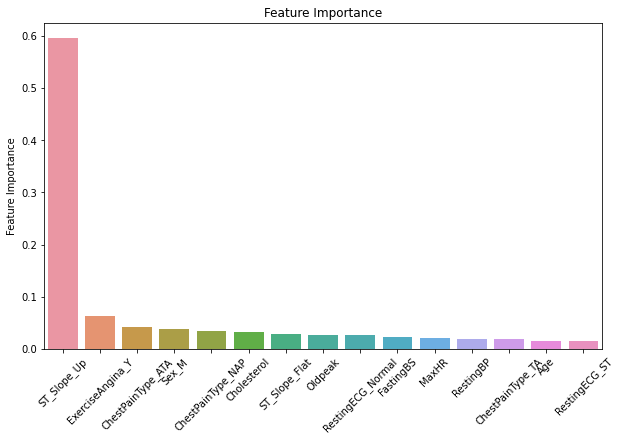

In [282]:
plt.figure(figsize=(10,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

The feature that weighs too much on the estimation can SOMETIMES cause overfitting. We are curious about what happens to our model if we drop the feature with contribution. For this reason, the most important feature will be dropped and the scores will be checked again.

In [283]:
X2 = X.drop(columns = ["ST_Slope_Up"]) 

In [284]:
X2.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

[[76  6]
 [11 91]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        82
           1       0.94      0.89      0.91       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

[[76  6]
 [11 91]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        82
           1       0.94      0.89      0.91       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

--------------------------------------------------------


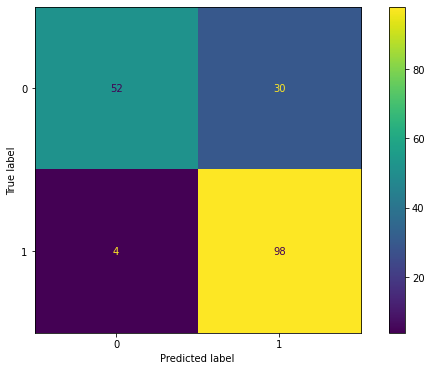

In [285]:
operations = [("scaler", MinMaxScaler()), ("xgb", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)
XGB_pipe_model.get_params()
XGB_pipe_model.fit(X_train, y_train)

y_pred = XGB_pipe_model.predict(X_test)
y_train_pred = XGB_pipe_model.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

xgb_pipe_f1 = f1_score(y_test, y_pred)
xgb_pipe_acc = accuracy_score(y_test, y_pred)
xgb_pipe_recall = recall_score(y_test, y_pred)
xgb_pipe_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_pipe_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

In [286]:
pipe_scores = cross_validate(XGB_pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

df_pipe_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.063       0.005          0.946           0.930        0.976    0.952
2      0.057       0.008          0.892           0.884        0.927    0.905
3      0.055       0.005          0.811           0.846        0.805    0.825
4      0.060       0.004          0.824           0.804        0.902    0.851
5      0.059       0.005          0.849           0.837        0.900    0.867
6      0.054       0.005          0.849           0.854        0.875    0.864
7      0.055       0.005          0.904           0.884        0.950    0.916
8      0.062       0.005          0.877           0.878        0.900    0.889
9      0.065       0.005          0.904           0.925        0.902    0.914
10     0.054       0.004          0.904           0.886        0.951    0.918

In [287]:
hd_pipe_scores.mean()[2:]

test_accuracy    0.858
test_precision   0.858
test_recall      0.894
test_f1          0.874
dtype: float64

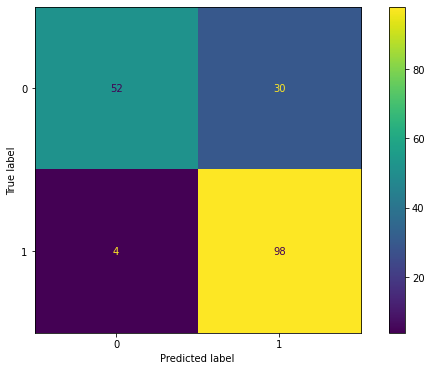

In [288]:
plot_confusion_matrix(XGB_pipe_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

In [289]:
# evaluate the pipeline

# from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
n_scores = cross_val_score(XGB_pipe_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f'Accuracy: Results Mean : %{round(n_scores.mean()*100,3)}, Results Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy: Results Mean : %87.505, Results Standard Deviation : 2.962


In [290]:
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.875 (0.030)


In [291]:
param_grid = {"n_estimators":[100, 300], 
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1], 
              "colsample_bytree":[0.5, 1]}

In [292]:
XGB_grid_model = XGBClassifier(random_state=42)
XGB_grid_model = GridSearchCV(XGB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [293]:
XGB_grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   22.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [

 looking at the best parameters & estimator found by GridSearchCV.

In [294]:
print(colored('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', 'blue'), colored(XGB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', 'blue'), colored(XGB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for RF Model: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for RF Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


[[74  8]
 [15 87]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        82
           1       0.92      0.85      0.88       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

--------------------------------------------------------


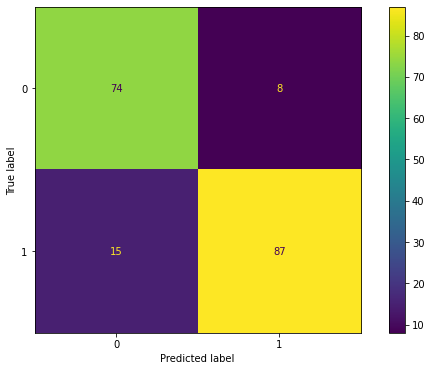

In [295]:
y_pred = XGB_grid_model.predict(X_test_scaled)
y_train_pred = XGB_grid_model.predict(X_train_scaled)

xgb_grid_f1 = f1_score(y_test, y_pred)
xgb_grid_acc = accuracy_score(y_test, y_pred)
xgb_grid_recall = recall_score(y_test, y_pred)
xgb_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_grid_model, X_test_scaled, y_test)

train_val=(y_train, y_train_pred, y_test, y_pred)

##### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

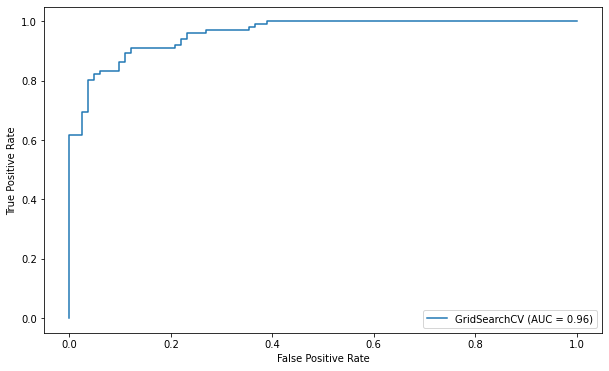

In [296]:
plot_roc_curve(XGB_grid_model, X_test_scaled, y_test);

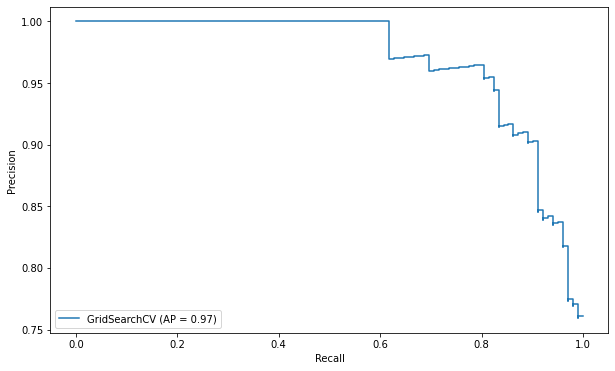

In [297]:
plot_precision_recall_curve(XGB_grid_model, X_test_scaled, y_test);

##### THE COMPARISON OF MODELS

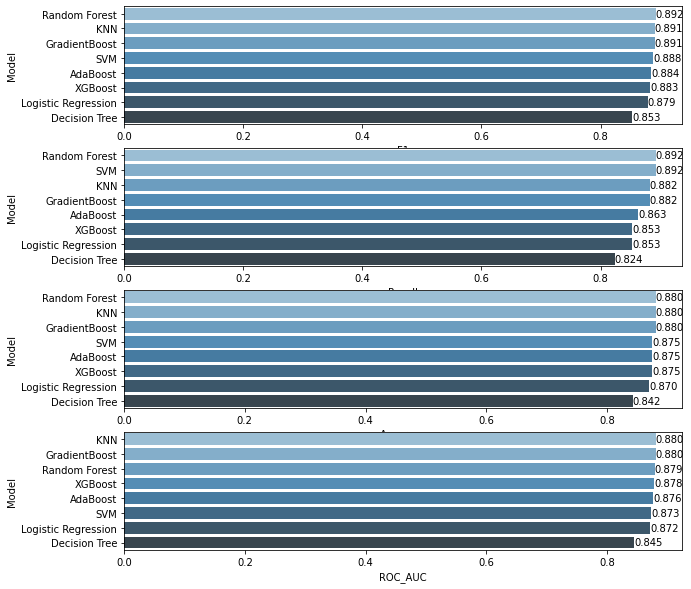

In [298]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "GradientBoost", "XGBoost"],
                        "F1": [log_f1, svm_grid_f1, knn_f1, dt_grid_f1, rf_grid_f1, ab_grid_f1, gb_f1, xgb_grid_f1],
                        "Recall": [log_recall, svm_grid_recall, knn_recall, dt_grid_recall, rf_grid_recall, ab_grid_recall, gb_recall, xgb_grid_recall],
                        "Accuracy": [log_acc, svm_grid_acc, knn_acc, dt_grid_acc, rf_grid_acc, ab_grid_acc, gb_acc, xgb_grid_acc],
                        "ROC_AUC": [log_auc, svm_grid_auc, knn_auc, dt_grid_auc, rf_grid_auc, ab_grid_auc, gb_auc, xgb_grid_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(10,10))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

##### CONCLUSION

- In this Analysis,

- i have tried to a predict classification problem in Heart Disease Dataset by a variety of models to classifiy Heart Disease predictions in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

- i have made the detailed exploratory analysis (EDA).

- There have been NO missing values in the Dataset.

- i have decided which metrics will be used.

- i have analyzed both target and features in detail.

- i have transformed categorical variables into dummies so we can use them in the models.

- i have cross-checked the models obtained from train sets by applying cross validation for each model performance.

- i have examined the feature importance of some models.


##### REFERENCES

- https://www.kaggle.com/azizozmen
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- https://www.researchgate.net/publication/49814836_Problematic_standard_errors_and_confidence_intervals_for_skewness_and_kurtosis
- https://www.researchgate.net/publication/304577646_Young_consumers'_intention_towards_buying_green_products_in_a_developing_nation_Extending_the_theory_of_planned_behavior
- https://www.researchgate.net/publication/314032599_TO_DETERMINE_SKEWNESS_MEAN_AND_DEVIATION_WITH_A_NEW_APPROACH_ON_CONTINUOUS_DATA
- https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon
- https://www.researchgate.net/publication/263372601_Resistance_motivations_trust_and_intention_to_use_mobile_financial_services
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://machinelearningmastery.com/power-transforms-with-scikit-learn/
- https://en.wikipedia.org/wiki/Dummy_variable_(statistics)
- https://www.displayr.com/what-are-dummy-variables/
- https://stattrek.com/multiple-regression/dummy-variables.aspx
- https://www.statisticshowto.com/dummy-variables/
- https://en.wikipedia.org/wiki/Feature_scaling
- https://www.dataschool.io/comparing-supervised-learning-algorithms/
- https://machinelearningmastery.com/handle-missing-data-python/
- https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values
- https://www.kaggle.com/karnikakapoor/fetal-health-classification
- https://www.kaggle.com/karnikakapoor/heart-failure-prediction-ann
- https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know
- https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro
- https://www.kaggle.com/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy